In [1]:
def siglas(nome_time):
    if nome_time == 'Bauru':
        return 'BAU'
    
    elif nome_time == 'MOGI1':
        return 'MOG'
    
    elif nome_time == 'VipTech CMB':
        return 'CMO'
    
    elif nome_time == 'Brasília':
        return 'BSB'
    
    elif nome_time == 'Paulistano':
        return 'CAP'
    
    elif nome_time == 'Flamengo':
        return 'FLA'
    
    elif nome_time == 'Minas':
        return 'MIN'
    
    elif nome_time == 'UNIFACISA':
        return 'UFC'
    
    elif nome_time == 'Cerrado':
        return 'CER'
    
    elif nome_time == 'SESI Franca':
        return 'FRA'
    
    elif nome_time == 'Corinthians':
        return 'COR'
    
    elif nome_time == 'Pinheiros':
        return 'PIN'
    
    elif nome_time == 'Fortaleza B. C':
        return 'FOR'
    
    elif nome_time == 'KTO Caxias do Sul':
        return 'CAX'
    
    elif nome_time == 'Pato':
        return 'PAT'
    
    elif nome_time == 'São Paulo':
        return 'SPF'

# Projeto: Análises Jogada-Jogada NBB 2019

Para esse projeto estaremos analisando jogos do NBB, principal campeonato brasileiro de basquetebol. Os dados contém os seguintes campos:

Colunas:
* Quartos
* Tempo
* placar_cada
* placar_visitante
* Nome
*


Coluna Indicadores técnicos:

* fim_quarto -> Fim de quarto (qualquer quarto)
* inicio_quarto -> Inicio de quarto (qualquer quarto)
* fim_partida  -> Fim da Partida
* incio partida -> Inicio da Partida
* Min        -> Minutos jogados do jogador
* Pts_C      -> Pontos Convertidos 
* Pts_T      -> Pontos Tentados 
* Pts_3_C    -> Três Pontos Convertidos 
* 3_T_Pts    -> Três Pontos Tentados
* 2_C_Pts    -> Dois Pontos Convertidos
* 2_T_Pts    -> Dois Pontos Tentados
* LL_Pts_C   -> Lances Livres Convertidos
* LL_Pts_T   -> Lances Livres Tentados
* RO         -> Rebotes Ofensivos
* RD         -> Rebotes Defensivos
* RT         -> Rebotes Totais
* AS         -> Assistências
* BR         -> Bolas Roubadas 
* TO         -> Tocos
* FC         -> Faltas Cometidas
* FC_T         -> Faltas Técnica
* FC_A         -> Faltas Antidesportiva
* FC_O       -> Faltas Ofensiva
* FC_D        -> Faltas Desqualificante
* Entra       -> Entrada na Substituição 
* Sai           -> Saida na Substituição 
* tempo_tecnico -> Tempo Técnico
* ER         -> Erros
* FR         -> Faltas Recebidas 
* EN         -> Enterradas
* Ar_Pts_C   -> Arremessos dos Pontos Convertidos
* Ar_Pts_C   -> Arremessos dos Pontos Tentados 
* Pos        -> Posse de bola do time 

In [2]:
# !pip install dataframe_image

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import re
import dataframe_image as dfi

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from fpdf import FPDF
from funcoes_relatorio_analises import *

In [6]:
%matplotlib inline

In [7]:
# df = pd.read_csv("tabela_1_VipTech CMB_x_Fortaleza B. C.1.csv")

In [8]:
df = pd.read_csv("tabela_42_Pato Basquete_x_Sesi Franca.csv")

## Precisa colocar algumas informações básicas sobre o jogo para que completar a tabela 

### Mogi colocar MOGI1

In [9]:
nome_time_casa = 'Pato'
nome_time_fora = 'SESI Franca'

In [10]:
df

,Unnamed: 0,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome
0,0,4,00:00,64,86,NaN,fim_partida,NaN
1,1,4,00:00,64,86,NaN,fim_quarto,NaN
2,2,4,00:26,64,86,FRA,LL_Pts_C,Nathan
3,3,4,00:26,64,85,FRA,LL_Pts_C,Nathan
4,4,4,00:26,64,84,FRA,FR,Nathan
...,...,...,...,...,...,...,...,...
547,547,1,10:00,0,0,PAT,substituicao_entra,Matheusinho
548,548,1,10:00,0,0,PAT,substituicao_entra,Leal
549,549,1,10:00,0,0,PAT,substituicao_entra,Funches III
550,550,1,10:00,0,0,PAT,substituicao_entra,I Thornton


# Informações básicas sobre o jogo 

In [11]:
data_hoje = datetime.today().strftime('%d/%m/%Y')
dia_do_jogo = '02/01/2021'
temporada = 2019
sigla_time_a = siglas(nome_time_casa)
sigla_time_b = siglas(nome_time_fora)
casa = 'casa'
fora = 'fora'
classificatoria = '1 Turno'

In [12]:
arquivo = 'RELATORIO'
arquivo1 = f'informacoes_dos_times/{nome_time_casa}'
arquivo2 = f'informacoes_dos_times/{nome_time_fora}'
img_casa = f'{arquivo1}/{nome_time_casa}'
img_fora = f'{arquivo2}/{nome_time_fora}'

In [13]:
dia_do_jogo

'02/01/2021'

# Limpeza dos dados 

* primeiro evitar NAN (acredite!!! tem isso no site)

In [14]:
df.dropna(subset=['Tempo'], inplace=True)

* mudança do tempo
* colocar todos em segundos para facilitar a vida
* tem jogos que o site apresenta numeros inteiros (1, 12, 134, 1000)
* para isso localizei o valores errados e concertei

In [15]:
mudar_hora = []
for x in df['Tempo']:
    if re.findall(r'..:..', x):
        mudar_hora.append(x)
    else:
        if re.findall(r'....', x):
            x = x[0:2] + ':' + x[2:4]
            mudar_hora.append(x)
        elif re.findall(r'...', x):
            x = '0' + x[0] + ':' + x[1:3]
            mudar_hora.append(x)
        elif re.findall(r'..', x):
            x = '00:' + x
            mudar_hora.append(x)
        elif re.findall(r'.', x):
            x = '00:0' + x
            mudar_hora.append(x)

df['Tempo_2'] = mudar_hora
df.drop('Tempo', axis=1, inplace=True)

In [16]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.datetime.strptime(x, '%M:%S'))

In [17]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: dt.time(x.hour, x.minute, x.second))

In [18]:
df['Tempo_2'] = df['Tempo_2'].apply(lambda x: (x.hour * 60 + x.minute) * 60 + x.second)

In [19]:
# transforma os dados para números inteiros
df['Quarto'] = df['Quarto'].apply(lambda l: int(l))

In [20]:
# modificar o tempo decrescente para crescente (* -1)
# acrescentar o tempo de cada quarto (primeiro quarto termina em 600s, o segundo quarto 2*600 = 1200 ...)
tempo_novo = []
for x, y in zip(df['Quarto'], df['Tempo_2']):
    if x == 1:
        a = (y - (600 * 1)) * -1
        tempo_novo.append(a)
    elif x == 2:
        a = (y - (600 * 2)) * -1
        tempo_novo.append(a)
    elif x == 3:
        a = (y - (600 * 3)) * -1
        tempo_novo.append(a)
    elif x == 4:
        a = (y - (600 * 4)) * -1
        tempo_novo.append(a)
    elif x == 5:
        a = (y - (600 * 4.5)) * -1
        tempo_novo.append(a)
    elif x == 6:
        a = (y - (600 * 5)) * -1
        tempo_novo.append(a)
    elif x == 7:
        a = (y - (600 * 5.5)) * -1
        tempo_novo.append(a)

df['Tempo'] = tempo_novo
df.drop('Tempo_2', axis=1, inplace=True)

In [21]:
# deixando o DataFrame nessa ordem de colunas
df = df[['Quarto', 'Tempo', 'placar_casa', 'placar_visitante', 'Time', 'Indicador', 'Nome']]

#  Acrescentamos mais colunas

In [22]:
df['diferenca_placar_casa'] = df['placar_casa'] - df['placar_visitante']
df['diferenca_placar_visitante'] = df['placar_visitante'] - df['placar_casa']
df

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,4,2400,64,86,NaN,fim_partida,NaN,-22,22
1,4,2400,64,86,NaN,fim_quarto,NaN,-22,22
2,4,2374,64,86,FRA,LL_Pts_C,Nathan,-22,22
3,4,2374,64,85,FRA,LL_Pts_C,Nathan,-21,21
4,4,2374,64,84,FRA,FR,Nathan,-20,20
...,...,...,...,...,...,...,...,...,...
547,1,0,0,0,PAT,substituicao_entra,Matheusinho,0,0
548,1,0,0,0,PAT,substituicao_entra,Leal,0,0
549,1,0,0,0,PAT,substituicao_entra,Funches III,0,0
550,1,0,0,0,PAT,substituicao_entra,I Thornton,0,0


# Analise da pontuação dos times

In [23]:
pontuacao = df[(df['Indicador'] == '3_Pts_C') | 
               (df['Indicador'] == '2_Pts_C') |
               (df['Indicador'] == 'LL_Pts_C')|
               (df['Indicador'] == 'EN')|
               (df['Indicador'] == 'fim_partida')]
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,4,2400,64,86,NaN,fim_partida,NaN,-22,22
2,4,2374,64,86,FRA,LL_Pts_C,Nathan,-22,22
3,4,2374,64,85,FRA,LL_Pts_C,Nathan,-21,21
14,4,2361,64,84,PAT,2_Pts_C,Matheusinho,-20,20
19,4,2325,62,84,FRA,2_Pts_C,Adyel,-22,22
...,...,...,...,...,...,...,...,...,...
491,1,237,3,6,FRA,LL_Pts_C,Fuzaro,-3,3
507,1,178,3,5,PAT,2_Pts_C,Leal,-2,2
513,1,157,1,5,FRA,2_Pts_C,Fuzaro,-4,4
520,1,122,1,3,PAT,LL_Pts_C,Funches III,-2,2


In [24]:
# estamos invertendo os valores para deixar parecido com o jogo
pontuacao = pontuacao[::-1]
pontuacao.reset_index(drop=True, inplace=True)
quartos = [600, 1200, 1800, 2400]
pontuacao

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,33,0,3,FRA,3_Pts_C,Lucas Dias,-3,3
1,1,122,1,3,PAT,LL_Pts_C,Funches III,-2,2
2,1,157,1,5,FRA,2_Pts_C,Fuzaro,-4,4
3,1,178,3,5,PAT,2_Pts_C,Leal,-2,2
4,1,237,3,6,FRA,LL_Pts_C,Fuzaro,-3,3
...,...,...,...,...,...,...,...,...,...
81,4,2325,62,84,FRA,2_Pts_C,Adyel,-22,22
82,4,2361,64,84,PAT,2_Pts_C,Matheusinho,-20,20
83,4,2374,64,85,FRA,LL_Pts_C,Nathan,-21,21
84,4,2374,64,86,FRA,LL_Pts_C,Nathan,-22,22


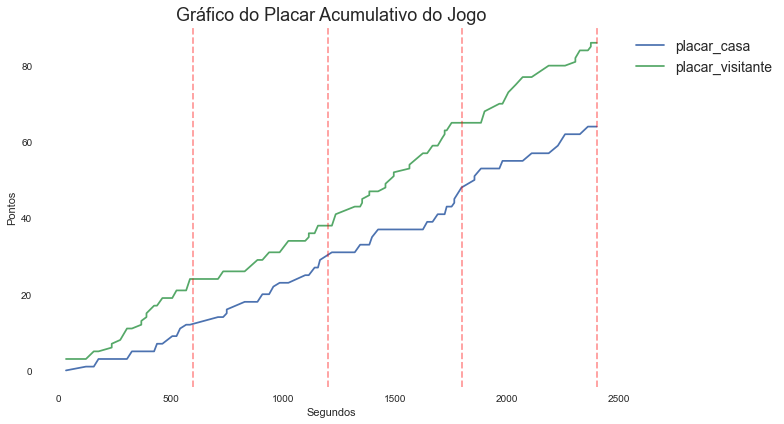

In [25]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(11,6))
tempo = pontuacao['Tempo']
pontuacao1 = pontuacao['placar_casa']
pontuacao2 = pontuacao['placar_visitante']
plt.plot(tempo, pontuacao1, label='placar_casa')
plt.plot(tempo, pontuacao2, label='placar_visitante')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.title('Gráfico do Placar Acumulativo do Jogo', fontsize=18)
plt.ylabel('Pontos')
plt.xlabel('Segundos')
plt.tight_layout()
plt.savefig('RELATORIO/teste.jpeg', format='jpg')

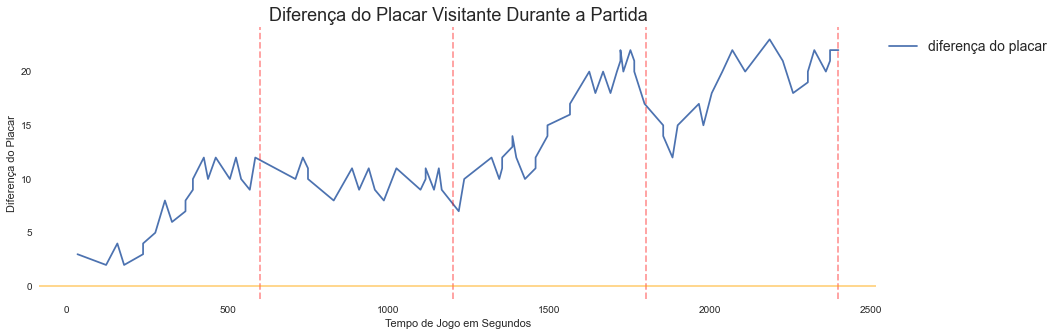

In [26]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'diferença do placar')
plt.title('Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

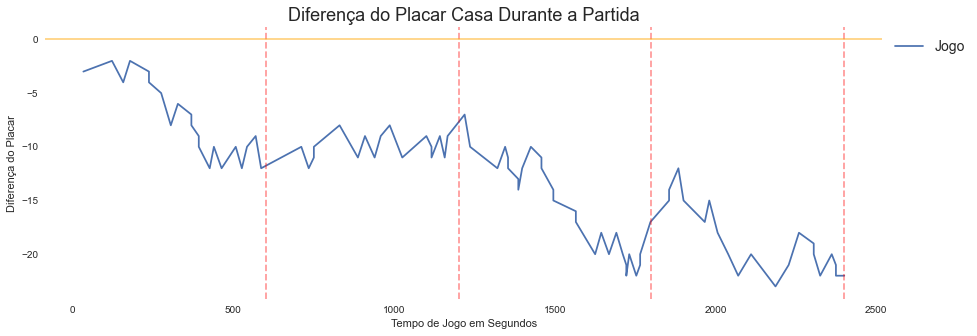

In [27]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_casa'], label = 'Jogo')
plt.title('Diferença do Placar Casa Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in quartos:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.axhline(0, color='orange', label=pontuacao.index, alpha=0.5)

# Análise da Posse de Bola dos times

#### precisa fazer mais uma conta 

como as paradas são realizadas no primeiro momento em que se realiza ponto, nós perdemos as ações anteriores antes desse ponto acontecer
- A ideia é encontrar os pontos realizado (isso já foi realizado)
- depois precisa pegar esse ponto inicial e comparar em qual posse de bola se encontra esse inicio 
- ai sim podemos pegar o início da posse das ações que aconteceram anteriormente 

In [28]:
posse_bola = df[(df['Indicador'] == '3_Pts_C') | (df['Indicador'] == '3_Pts_T') | 
                (df['Indicador'] == '2_Pts_C') | (df['Indicador'] == '2_Pts_T') |
                (df['Indicador'] == 'LL_Pts_C') | (df['Indicador'] == 'LL_Pts_T') |
                (df['Indicador'] == 'ER') | (df['Indicador'] == 'FC_O')|                
                (df['Indicador'] == 'EN') | (df['Indicador'] == 'fim_partida')]

In [29]:
# estamos invertendo os valores para deixar parecido com o jogo
posse_bola = posse_bola[::-1]
posse_bola.reset_index(drop=True, inplace=True)
posse_bola

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,24,0,0,PAT,2_Pts_T,Matheusinho,0,0
1,1,33,0,3,FRA,3_Pts_C,Lucas Dias,-3,3
2,1,48,0,3,PAT,2_Pts_T,Aquiles,-3,3
3,1,60,0,3,PAT,3_Pts_T,Aquiles,-3,3
4,1,88,0,3,FRA,2_Pts_T,André Goes,-3,3
...,...,...,...,...,...,...,...,...,...
201,4,2374,64,84,FRA,2_Pts_T,Adyel,-20,20
202,4,2374,64,84,FRA,2_Pts_T,Adyel,-20,20
203,4,2374,64,85,FRA,LL_Pts_C,Nathan,-21,21
204,4,2374,64,86,FRA,LL_Pts_C,Nathan,-22,22


In [30]:
# Utilizamos uma Flag para diferenciar as paradas entre os tempos iniciais de cada posse
flag = -1
# valores da ultima linha 
ultima_linha = []
# valores finais da posse de bola
tempo_a_peridodo_final = []
tempo_b_peridodo_final = []
# identifica o tempo final
tempo_a_fim = 0
tempo_b_fim = 0

for i in range(len(posse_bola)):
    # caso corresponda ao nome do time A
    if posse_bola['Time'][i] == sigla_time_a:
        if flag != 1:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time A
            # o loop do Time B é terminado 
            tempo_b_peridodo_final.append(tempo_b_fim)
            # pega o primeiro valor do tempo de início
            tempo_a_fim = posse_bola['Tempo'][i]
            flag = 1
        else:
            tempo_a_fim = posse_bola['Tempo'][i]
            flag = 1
    # caso corresponda ao nome do time B
    elif posse_bola['Time'][i] == sigla_time_b:
        if flag != 0:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time B
            # o loop do Time A é terminado 
            tempo_a_peridodo_final.append(tempo_a_fim)
            # pega o primeiro valor do tempo final
            tempo_b_fim = posse_bola['Tempo'][i]
            flag = 0
        else:
            tempo_b_fim = posse_bola['Tempo'][i]
            flag = 0
    # caso corresponda ao termino da partida
    else:
        # caso chegue no final da linha os valores são armazenados
        ultima_linha = posse_bola['Tempo'][i]
        if flag != 1:
            tempo_b_peridodo_final.append(tempo_b_fim)
        else:
            tempo_a_peridodo_final.append(tempo_a_fim)

In [31]:
len(tempo_a_peridodo_final)

80

In [32]:
len(tempo_b_peridodo_final)

81

In [33]:
len(tempo_a_peridodo_final) == len(tempo_b_peridodo_final)

False

In [34]:
# caso o tamanho do inicio esteja variando  por causa dos ultimos lances relacionados ao tempo de partida 
# a gente alinha dessa forma 
if len(tempo_a_peridodo_final) < len(tempo_b_peridodo_final):
    # o fim do tempo b é o início do tempo A, pq a troca de bola é alternada
    tempo_a_peridodo_final.append(ultima_linha)
    nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
    posse_de_bola_a = pd.DataFrame()
    posse_de_bola_a['Time'] = nome_time_A
    posse_de_bola_a['Tempo_de_Inicio'] = tempo_b_peridodo_final
    posse_de_bola_a['Tempo_de_Termino'] = tempo_a_peridodo_final
    ########################################################################
    del(tempo_b_peridodo_final[0])
    tempo_b_peridodo_final.append(ultima_linha)
    nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
    posse_de_bola_b = pd.DataFrame()
    posse_de_bola_b['Time'] = nome_time_B
    posse_de_bola_b['Tempo_de_Inicio'] = tempo_a_peridodo_final
    posse_de_bola_b['Tempo_de_Termino'] = tempo_b_peridodo_final
    
# e acrescenta no a e agora tb acrescenta no B
elif len(tempo_a_peridodo_final) > len(tempo_b_peridodo_final):
    tempo_b_peridodo_final.append(ultima_linha)
    nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
    posse_de_bola_b = pd.DataFrame()
    posse_de_bola_b['Time'] = nome_time_B
    posse_de_bola_b['Tempo_de_Inicio'] = tempo_a_peridodo_final
    posse_de_bola_b['Tempo_de_Termino'] = tempo_b_peridodo_final
    ###############################################################
    del(tempo_a_peridodo_final[0])
    tempo_a_peridodo_final.append(ultima_linha)
    nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
    posse_de_bola_a = pd.DataFrame()
    posse_de_bola_a['Time'] = nome_time_A
    posse_de_bola_a['Tempo_de_Inicio'] = tempo_b_peridodo_final
    posse_de_bola_a['Tempo_de_Termino'] = tempo_a_peridodo_final
    
elif len(tempo_a_peridodo_final) == len(tempo_b_peridodo_final):
    if tempo_a_peridodo_final[0] == 0:
        nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
        posse_de_bola_b = pd.DataFrame()
        posse_de_bola_b['Time'] = nome_time_B
        posse_de_bola_b['Tempo_de_Inicio'] = tempo_a_peridodo_final
        posse_de_bola_b['Tempo_de_Termino'] = tempo_b_peridodo_final
        #######################################
        del(tempo_a_peridodo_final[0])
        tempo_a_peridodo_final.append(ultima_linha)
        nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
        posse_de_bola_a = pd.DataFrame()
        posse_de_bola_a['Time'] = nome_time_A
        posse_de_bola_a['Tempo_de_Inicio'] = tempo_b_peridodo_final
        posse_de_bola_a['Tempo_de_Termino'] = tempo_a_peridodo_final

    elif tempo_b_peridodo_final[0] == 0:
        nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
        posse_de_bola_a = pd.DataFrame()
        posse_de_bola_a['Time'] = nome_time_A
        posse_de_bola_a['Tempo_de_Inicio'] = tempo_b_peridodo_final
        posse_de_bola_a['Tempo_de_Termino'] = tempo_a_peridodo_final
        #######################################
        del(tempo_b_peridodo_final[0])
        tempo_b_peridodo_final.append(ultima_linha)
        nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
        posse_de_bola_b = pd.DataFrame()
        posse_de_bola_b['Time'] = nome_time_B
        posse_de_bola_b['Tempo_de_Inicio'] = tempo_a_peridodo_final
        posse_de_bola_b['Tempo_de_Termino'] = tempo_b_peridodo_final

In [35]:
posse_de_bola = pd.concat([posse_de_bola_a, posse_de_bola_b], ignore_index=True)

In [36]:
posse_de_bola.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)

In [37]:
posse_de_bola['Tempo_de_Termino'] = posse_de_bola['Tempo_de_Termino'].astype(int)

In [38]:
posse_de_bola['Tempo_Posse'] = posse_de_bola['Tempo_de_Termino'] - posse_de_bola['Tempo_de_Inicio']
posse_de_bola['Tempo_Posse'] = posse_de_bola['Tempo_Posse'].apply(lambda x: abs(x))

In [39]:
posse_de_bola.reset_index(inplace=True, drop=True)
posse_de_bola

,Time,Tempo_de_Inicio,Tempo_de_Termino,Tempo_Posse
0,PAT,0,24,24
1,FRA,24,33,9
2,PAT,33,60,27
3,FRA,60,88,28
4,PAT,88,95,7
...,...,...,...,...
157,FRA,2339,2356,17
158,PAT,2356,2361,5
159,FRA,2361,2374,13
160,PAT,2374,2400,26


In [40]:
posse_de_bola.to_csv('tempo2.csv')

In [41]:
teste = posse_de_bola[posse_de_bola['Time']==sigla_time_a]
teste.reset_index(inplace=True,drop=True)
teste1 = posse_de_bola[posse_de_bola['Time']==sigla_time_b]
teste1.reset_index(inplace=True,drop=True)

In [42]:
grafico_posse_time1 = teste
grafico_posse_time1.reset_index(inplace=True)
grafico_posse_time2 = teste1
grafico_posse_time2.reset_index(inplace=True)

In [43]:
grafico_posse_time1

,index,Time,Tempo_de_Inicio,Tempo_de_Termino,Tempo_Posse
0,0,PAT,0,24,24
1,1,PAT,33,60,27
2,2,PAT,88,95,7
3,3,PAT,113,122,9
4,4,PAT,128,146,18
...,...,...,...,...,...
76,76,PAT,2283,2290,7
77,77,PAT,2305,2312,7
78,78,PAT,2325,2339,14
79,79,PAT,2356,2361,5


In [44]:
grafico_posse_time2

,index,Time,Tempo_de_Inicio,Tempo_de_Termino,Tempo_Posse
0,0,FRA,24,33,9
1,1,FRA,60,88,28
2,2,FRA,95,113,18
3,3,FRA,122,128,6
4,4,FRA,146,157,11
...,...,...,...,...,...
76,76,FRA,2290,2305,15
77,77,FRA,2312,2325,13
78,78,FRA,2339,2356,17
79,79,FRA,2361,2374,13


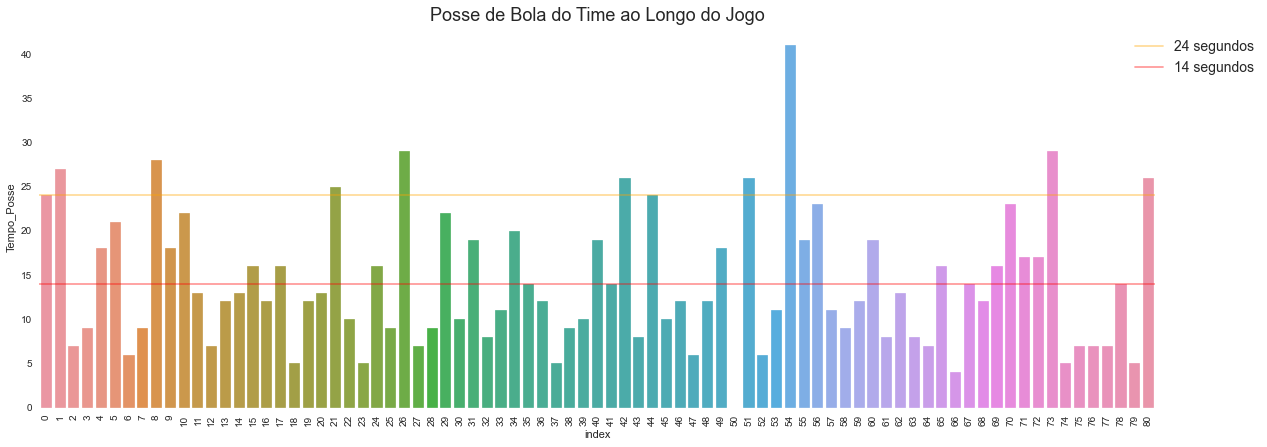

In [45]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Tempo_Posse', data=grafico_posse_time1)
plt.title('Posse de Bola do Time ao Longo do Jogo', fontsize=18)
plt.xticks(rotation=90)
plt.axhline(24, color='orange', alpha=0.4, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.4, label = '14 segundos')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste3.png', format='png')

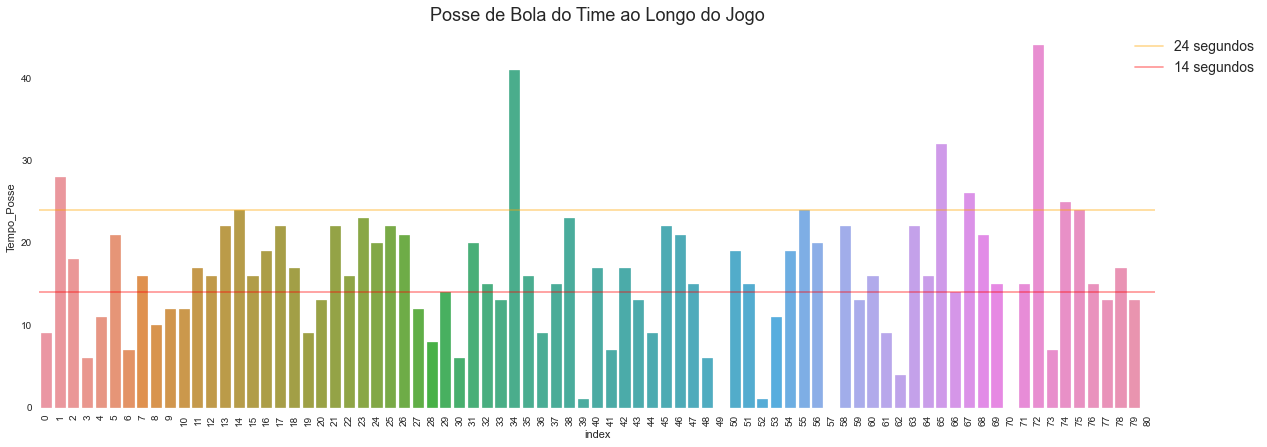

In [46]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.barplot(x='index', y='Tempo_Posse', data=grafico_posse_time2)
plt.title('Posse de Bola do Time ao Longo do Jogo', fontsize=18)
plt.xticks(rotation=90)
plt.axhline(24, color='orange', alpha=0.4, label = '24 segundos')
plt.axhline(14, color='red', alpha=0.4, label = '14 segundos')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size':14})
plt.savefig('RELATORIO/teste4.png', format='png')

# Analisar os períodos positivos dos times

In [47]:
# Criar um novo dataFrame para analisar os períodos positivos dos times
data = pd.DataFrame()
data['Time'] = pontuacao['Time']
data['Indicador'] = pontuacao['Indicador']
data['diff_pontuacao'] = pontuacao['diferenca_placar_visitante']
data['Tempo'] = pontuacao['Tempo']
data

,Time,Indicador,diff_pontuacao,Tempo
0,FRA,3_Pts_C,3,33
1,PAT,LL_Pts_C,2,122
2,FRA,2_Pts_C,4,157
3,PAT,2_Pts_C,2,178
4,FRA,LL_Pts_C,3,237
...,...,...,...,...
81,FRA,2_Pts_C,22,2325
82,PAT,2_Pts_C,20,2361
83,FRA,LL_Pts_C,21,2374
84,FRA,LL_Pts_C,22,2374


In [48]:
# Utilizando a diferença do placar entre casa e visitante, aplicando diff (diferença entre as linhas) 
# e usando seu valor absoluto (abs())
# nós podemos encontrar o valor de cada indicador técnico 
data["pontuacao"] = data["diff_pontuacao"].diff()
data["pontuacao"] = data["pontuacao"].apply(lambda x: abs(x))

In [49]:
# como o primeiro valor some quando fazemos a diff e esse primeiro valor é importante pq é o primeiro ponto, nós adicionamos ele
novo_valor = data["diff_pontuacao"][0]
data.loc[0, 'pontuacao'] = abs(novo_valor)

In [50]:
data.reset_index(drop=True, inplace=True)

In [51]:
data['pontuacao'] = data['pontuacao'].astype(int)
data.head(15)

,Time,Indicador,diff_pontuacao,Tempo,pontuacao
0,FRA,3_Pts_C,3,33,3
1,PAT,LL_Pts_C,2,122,1
2,FRA,2_Pts_C,4,157,2
3,PAT,2_Pts_C,2,178,2
4,FRA,LL_Pts_C,3,237,1
5,FRA,LL_Pts_C,4,237,1
6,FRA,LL_Pts_C,5,275,1
7,FRA,3_Pts_C,8,305,3
8,PAT,2_Pts_C,6,327,2
9,FRA,LL_Pts_C,7,369,1


In [52]:
data.to_csv('tempo2.csv')

In [53]:
# esse df é usado para retirar alguns argumentos que não fazem diferença 
# na função abaixo retiramos as listas vazias que o loop gera quando o time se repete 
def remove_item(my_list,*args):
    deletar = list(args)
    for item in deletar:
        while item in my_list:
            my_list.remove(item)
    return my_list

In [54]:
# Utilizamos uma Flag para diferenciar as paradas entre os tempos iniciais de cada posse
flag = -1
# valores da ultima linha 
ultima_linha = []
# valores finais da posse de bola
tempo_a_peridodo_final = []
tempo_b_peridodo_final = []
# identifica o tempo final
tempo_a_fim = 0
tempo_b_fim = 0
# utilizado para agrupar os valores da pontuação dos times
time_a = []
time_b = []
# utilizados para somar os valores agrupados da pontuação 
soma_a = []
soma_b = []

for i in range(len(data)):
    # caso corresponda ao nome do time A
    if data['Time'][i] == sigla_time_a:
        # adiciona o valor da pontuação
        time_a.append(data['pontuacao'][i])
        ##########################################
        # pegam os valores acumulados do time B e as soma
        soma_b.append(sum(time_b))
        # zera esse valor da pontuação para não interferir na mudaça do for
        time_b = []
        # remove esses valores zerados
        soma_b = remove_item(soma_b, 0)
        if flag != 1:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time A
            # o loop do Time B é terminado 
            tempo_b_peridodo_final.append(tempo_b_fim)
            # pega o primeiro valor do tempo de início
            tempo_a_fim = data['Tempo'][i]            
            flag = 1
        else:
            tempo_a_fim = data['Tempo'][i]
            flag = 1
    # caso corresponda ao nome do time B
    elif data['Time'][i] == sigla_time_b:
        # adiciona o valor da pontuação
        time_b.append(data['pontuacao'][i])
        #####################################################
        # pegam os valores acumulados do time A e as soma
        soma_a.append(sum(time_a))
        # zera esse valor da pontuação para não interferir na mudaça do for
        time_a = []
        # remove esses valores zerados
        soma_a = remove_item(soma_a, 0)
        if flag != 0:
            # quando chegamos na flag o pensamento é pegar o primeiro valor que apresenta no Time B
            # o loop do Time A é terminado 
            tempo_a_peridodo_final.append(tempo_a_fim)
            # pega o primeiro valor do tempo final
            tempo_b_fim = data['Tempo'][i]
            flag = 0
        else:
            tempo_b_fim = data['Tempo'][i]
            flag = 0
    # caso corresponda ao termino da partida
    else:
        # caso chegue no final da linha os valores são armazenados
        ultima_linha = data['Tempo'][i]
        if flag != 1:
            tempo_b_peridodo_final.append(tempo_b_fim)
            # aplicamos as ultimas somas  para cada time
            # e removemos os valores que estão zerados 
            soma_b.append(sum(time_b))
            soma_b = remove_item(soma_b, 0)
            soma_a.append(np.nan)
        else:
            tempo_a_peridodo_final.append(tempo_a_fim)
            # aplicamos as ultimas somas  para cada time
            # e removemos os valores que estão zerados 
            soma_a.append(sum(time_a))
            soma_a = remove_item(soma_a, 0)
            soma_b.append(np.nan)

In [55]:
len(soma_a)

24

In [56]:
len(soma_b)

24

In [57]:
len(tempo_a_peridodo_final)

24

In [58]:
len(tempo_b_peridodo_final)

24

In [59]:
# caso o tamanho do inicio esteja variando  por causa dos ultimos lances relacionados ao tempo de partida 
# a gente alinha dessa forma 
if len(tempo_a_peridodo_final) < len(tempo_b_peridodo_final):
    # o fim do tempo b é o início do tempo A, pq a troca de bola é alternada
    tempo_a_peridodo_final.append(ultima_linha)
    nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
    posse_de_bola_A = pd.DataFrame()
    posse_de_bola_A['Time'] = nome_time_A
    posse_de_bola_A['Tempo_de_Inicio'] = tempo_b_peridodo_final
    posse_de_bola_A['Tempo_de_Termino'] = tempo_a_peridodo_final
    posse_de_bola_A['Soma_Pontuacao'] = soma_a
    ########################################################################
    del(tempo_b_peridodo_final[0])
    tempo_b_peridodo_final.append(ultima_linha)
    soma_b.append(np.nan)
    nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
    posse_de_bola_B = pd.DataFrame()
    posse_de_bola_B['Time'] = nome_time_B
    posse_de_bola_B['Tempo_de_Inicio'] = tempo_a_peridodo_final
    posse_de_bola_B['Tempo_de_Termino'] = tempo_b_peridodo_final
    posse_de_bola_B['Soma_Pontuacao'] = soma_b

In [60]:
# e acrescenta no a e agora tb acrescenta no B
if len(tempo_a_peridodo_final) > len(tempo_b_peridodo_final):
    tempo_b_peridodo_final.append(ultima_linha)
    nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
    posse_de_bola_B = pd.DataFrame()
    posse_de_bola_B['Time'] = nome_time_B
    posse_de_bola_B['Tempo_de_Inicio'] = tempo_a_peridodo_final
    posse_de_bola_B['Tempo_de_Termino'] = tempo_b_peridodo_final
    posse_de_bola_B['Soma_Pontuacao'] = soma_b
    ###############################################################
    del(tempo_a_peridodo_final[0])
    tempo_a_peridodo_final.append(ultima_linha)
    soma_a.append(np.nan)
    nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
    posse_de_bola_A = pd.DataFrame()
    posse_de_bola_A['Time'] = nome_time_A
    posse_de_bola_A['Tempo_de_Inicio'] = tempo_b_peridodo_final
    posse_de_bola_A['Tempo_de_Termino'] = tempo_a_peridodo_final
    posse_de_bola_A['Soma_Pontuacao'] = soma_a

In [61]:
if len(tempo_a_peridodo_final) == len(tempo_b_peridodo_final):
    if tempo_a_peridodo_final[0] == 0:
        nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
        posse_de_bola_B = pd.DataFrame()
        posse_de_bola_B['Time'] = nome_time_B
        posse_de_bola_B['Tempo_de_Inicio'] = tempo_a_peridodo_final
        posse_de_bola_B['Tempo_de_Termino'] = tempo_b_peridodo_final
        posse_de_bola_B['Soma_Pontuacao'] = soma_b
        #######################################
        del(tempo_a_peridodo_final[0])
        tempo_a_peridodo_final.append(ultima_linha)
        nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
        posse_de_bola_A = pd.DataFrame()
        posse_de_bola_A['Time'] = nome_time_A
        posse_de_bola_A['Tempo_de_Inicio'] = tempo_b_peridodo_final
        posse_de_bola_A['Tempo_de_Termino'] = tempo_a_peridodo_final
        posse_de_bola_A['Soma_Pontuacao'] = soma_a
    elif tempo_b_peridodo_final[0] == 0:
        nome_time_A = [sigla_time_a for item03 in range(len(tempo_a_peridodo_final))]
        posse_de_bola_A = pd.DataFrame()
        posse_de_bola_A['Time'] = nome_time_A
        posse_de_bola_A['Tempo_de_Inicio'] = tempo_b_peridodo_final
        posse_de_bola_A['Tempo_de_Termino'] = tempo_a_peridodo_final
        posse_de_bola_A['Soma_Pontuacao'] = soma_a
        #######################################
        del(tempo_b_peridodo_final[0])
        tempo_b_peridodo_final.append(ultima_linha)
        nome_time_B = [sigla_time_b for item03 in range(len(tempo_b_peridodo_final))]
        posse_de_bola_B = pd.DataFrame()
        posse_de_bola_B['Time'] = nome_time_B
        posse_de_bola_B['Tempo_de_Inicio'] = tempo_a_peridodo_final
        posse_de_bola_B['Tempo_de_Termino'] = tempo_b_peridodo_final
        posse_de_bola_B['Soma_Pontuacao'] = soma_b

In [62]:
posse_de_bola_A

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,PAT,33,122,1.0
1,PAT,157,178,2.0
2,PAT,305,327,2.0
3,PAT,426,439,2.0
4,PAT,463,507,2.0
5,PAT,526,569,3.0
6,PAT,586,711,2.0
7,PAT,734,830,4.0
8,PAT,887,909,2.0
9,PAT,939,986,3.0


In [63]:
posse_de_bola_B

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,FRA,0,33,3
1,FRA,122,157,2
2,FRA,178,305,6
3,FRA,327,426,6
4,FRA,439,463,2
5,FRA,507,526,2
6,FRA,569,586,3
7,FRA,711,734,2
8,FRA,830,887,3
9,FRA,909,939,2


In [64]:
posse_de_bola_bruta = pd.concat([posse_de_bola_A, posse_de_bola_B], ignore_index=True)

In [65]:
posse_de_bola_bruta.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)

In [66]:
posse_de_bola_bruta["diff_pontuacao"] = posse_de_bola_bruta["Soma_Pontuacao"].diff()
posse_de_bola_bruta.head(10)

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao,diff_pontuacao
0,FRA,0,33,3.0,NaN
1,PAT,33,122,1.0,-2.0
2,FRA,122,157,2.0,1.0
3,PAT,157,178,2.0,0.0
4,FRA,178,305,6.0,4.0
5,PAT,305,327,2.0,-4.0
6,FRA,327,426,6.0,4.0
7,PAT,426,439,2.0,-4.0
8,FRA,439,463,2.0,0.0
9,PAT,463,507,2.0,0.0


In [67]:
periodos_posteriores = []
for i in range(len(posse_de_bola_bruta)):
    if posse_de_bola_bruta['Soma_Pontuacao'][i] >= 5:
        periodo_potencial_a_positivo = 1
    else:
        if (posse_de_bola_bruta['diff_pontuacao'][i] <= -4) & (posse_de_bola_bruta['Soma_Pontuacao'][i] < 3):
            periodos_posteriores.append(posse_de_bola_bruta['Tempo_de_Inicio'][i])
            if periodo_potencial_a_positivo == 1:
                periodo_potencial_a_positivo = 0
            elif periodo_potencial_a_positivo != 1:
                periodo_potencial_a_positivo = 0

In [68]:
periodos_posteriores

[305, 426, 1625, 2070]

In [69]:
periodos_iniciais = posse_de_bola_bruta[~posse_de_bola_bruta['Tempo_de_Inicio'].isin(periodos_posteriores)]
periodos_iniciais.reset_index(inplace=True, drop=True)
periodos_iniciais.head(10)

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao,diff_pontuacao
0,FRA,0,33,3.0,NaN
1,PAT,33,122,1.0,-2.0
2,FRA,122,157,2.0,1.0
3,PAT,157,178,2.0,0.0
4,FRA,178,305,6.0,4.0
5,FRA,327,426,6.0,4.0
6,FRA,439,463,2.0,0.0
7,PAT,463,507,2.0,0.0
8,FRA,507,526,2.0,0.0
9,PAT,526,569,3.0,1.0


In [70]:
flag = -1
tempo_a_peridodo_inicial = []
tempo_b_peridodo_inicial = []
tempo_a_peridodo_final = []
tempo_b_peridodo_final = []
pontuação_a = []
pontuação_b = []
nome_time_A = []
nome_time_B = []
# como o time do flamengo começa, o time de minas não apresenta o primeiro valor
# por causa disso é acrescentado um valor 0 que não existe 
potencial_final_periodo_a = 0
potencial_final_periodo_b = 0

for i in range(len(periodos_iniciais)):
    if periodos_iniciais['Time'][i] == sigla_time_a:
        if flag != 1:
            potencial_final_periodo_a = periodos_iniciais['Tempo_de_Termino'][i]
            tempo_a_peridodo_inicial.append(periodos_iniciais['Tempo_de_Inicio'][i])
            nome_time_A.append(periodos_iniciais['Time'][i])
            pontuação_a.append(periodos_iniciais['Soma_Pontuacao'][i])
            ##################################################################
            tempo_b_peridodo_final.append(potencial_final_periodo_b)
            flag = 1
        else:
            potencial_final_periodo_a = periodos_iniciais['Tempo_de_Termino'][i]
            flag = 1
    else:
        if flag != 0:
            tempo_a_peridodo_final.append(potencial_final_periodo_a)
            ############################################################
            potencial_final_periodo_b = periodos_iniciais['Tempo_de_Termino'][i]
            tempo_b_peridodo_inicial.append(periodos_iniciais['Tempo_de_Inicio'][i])
            nome_time_B.append(periodos_iniciais['Time'][i])
            pontuação_b.append(periodos_iniciais['Soma_Pontuacao'][i])
            flag = 0
        else:
            potencial_final_periodo_b = periodos_iniciais['Tempo_de_Termino'][i]
            flag = 0

In [71]:
len(tempo_b_peridodo_inicial)

20

In [72]:
len(tempo_a_peridodo_inicial)

20

In [73]:
if len(tempo_a_peridodo_final) == len(tempo_b_peridodo_final):
    if tempo_a_peridodo_final[0] == 0:
        periodos_B = pd.DataFrame()
        periodos_B['Time'] = nome_time_B
        periodos_B['Tempo_de_Inicio'] = tempo_b_peridodo_inicial
        periodos_B['Tempo_de_Termino'] = tempo_b_peridodo_final
        periodos_B['Soma_Pontuacao'] = pontuação_b
        #######################################
        del(tempo_a_peridodo_final[0])
        tempo_a_peridodo_final.append(ultima_linha)
        periodos_A = pd.DataFrame()
        periodos_A['Time'] = nome_time_A
        periodos_A['Tempo_de_Inicio'] = tempo_a_peridodo_inicial
        periodos_A['Tempo_de_Termino'] = tempo_a_peridodo_final
        periodos_A['Soma_Pontuacao'] = pontuação_a
    elif tempo_b_peridodo_final[0] == 0:
        periodos_A = pd.DataFrame()
        periodos_A['Time'] = nome_time_A
        periodos_A['Tempo_de_Inicio'] = tempo_a_peridodo_inicial
        periodos_A['Tempo_de_Termino'] = tempo_a_peridodo_final
        periodos_A['Soma_Pontuacao'] = pontuação_a
        #######################################
        del(tempo_b_peridodo_final[0])
        tempo_b_peridodo_final.append(ultima_linha)
        periodos_B = pd.DataFrame()
        periodos_B['Time'] = nome_time_B
        periodos_B['Tempo_de_Inicio'] = tempo_b_peridodo_inicial
        periodos_B['Tempo_de_Termino'] = tempo_b_peridodo_final
        periodos_B['Soma_Pontuacao'] = pontuação_b

In [74]:
periodo = pd.concat([periodos_A, periodos_B], ignore_index=True)

In [75]:
periodo.sort_values(by='Tempo_de_Inicio', ignore_index=True, inplace=True)
periodo.head()

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
0,FRA,0,33,3.0
1,PAT,33,122,1.0
2,FRA,122,157,2.0
3,PAT,157,178,2.0
4,FRA,178,463,6.0


In [76]:
periodo_final_a = periodo.loc[(periodo['Soma_Pontuacao'] >=5) & (periodo['Time'] == sigla_time_a)]
periodo_final_a

,Time,Tempo_de_Inicio,Tempo_de_Termino,Soma_Pontuacao
31,PAT,1753,1884,10.0
35,PAT,2186,2259,5.0


In [77]:
periodo_final_a_inicio = list(periodo_final_a['Tempo_de_Inicio'])
periodo_final_a_final = list(periodo_final_a['Tempo_de_Termino'])

In [78]:
periodo_final_a_inicio

[1753, 2186]

In [79]:
periodo_final_a_final

[1884, 2259]

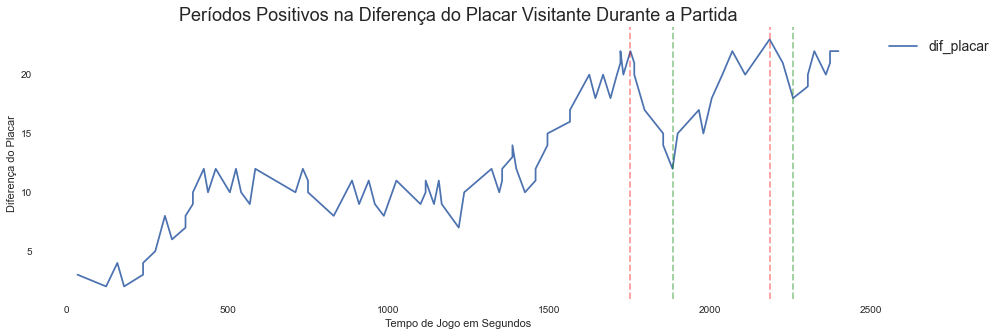

In [80]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'dif_placar')
plt.title('Períodos Positivos na Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in periodo_final_a_inicio:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
for x in periodo_final_a_final:
    plt.axvline(x, color='green', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.savefig('RELATORIO/teste1.jpeg', format='jpg')

In [81]:
periodo_final_b = periodo.loc[(periodo['Soma_Pontuacao'] >=5) & (periodo['Time'] == sigla_time_b)]

In [82]:
periodo_final_b_inicio = list(periodo_final_b['Tempo_de_Inicio'])
periodo_final_b_final = list(periodo_final_b['Tempo_de_Termino'])

In [83]:
periodo_final_b_inicio

[178, 1219, 1425, 1884, 1980]

In [84]:
periodo_final_b_final

[463, 1321, 1668, 1966, 2186]

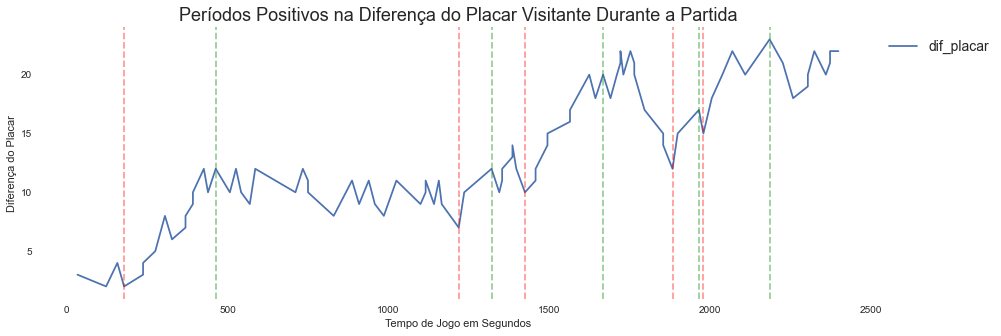

In [85]:
plt.style.use('seaborn')
sns.set_style('white')
plt.figure(figsize=(15,5))
plt.plot(pontuacao['Tempo'], pontuacao['diferenca_placar_visitante'], label = 'dif_placar')
plt.title('Períodos Positivos na Diferença do Placar Visitante Durante a Partida', fontsize=18)
plt.xlabel('Tempo de Jogo em Segundos')
plt.ylabel('Diferença do Placar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size':14})
for x in periodo_final_b_inicio:
    plt.axvline(x, color='red', label=pontuacao.index, linestyle='--', alpha=0.4)
for x in periodo_final_b_final:
    plt.axvline(x, color='green', label=pontuacao.index, linestyle='--', alpha=0.4)
plt.savefig('RELATORIO/teste2.jpeg', format='jpg')

# Tabela de dados geral

In [86]:
Tabela_Geral = df[['Time','Indicador','Nome']]

In [87]:
Tabela_Geral

,Time,Indicador,Nome
0,NaN,fim_partida,NaN
1,NaN,fim_quarto,NaN
2,FRA,LL_Pts_C,Nathan
3,FRA,LL_Pts_C,Nathan
4,FRA,FR,Nathan
...,...,...,...
547,PAT,substituicao_entra,Matheusinho
548,PAT,substituicao_entra,Leal
549,PAT,substituicao_entra,Funches III
550,PAT,substituicao_entra,I Thornton


In [88]:
Tabela_Geral_Time1 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_a]
Tabela_Geral_Time2 = Tabela_Geral[Tabela_Geral['Time'] == sigla_time_b]

In [89]:
Tabela_Geral_Time1

,Time,Indicador,Nome
5,PAT,FC,Leal
14,PAT,2_Pts_C,Matheusinho
15,PAT,BR,Matheusinho
18,PAT,3_Pts_T,Matheusinho
21,PAT,ER,Matheusinho
...,...,...,...
546,PAT,substituicao_entra,Aquiles
547,PAT,substituicao_entra,Matheusinho
548,PAT,substituicao_entra,Leal
549,PAT,substituicao_entra,Funches III


In [90]:
tabela_time1 = Tabela_Geral_Time1.groupby(['Nome', 'Indicador']).count()
tabela_time2 = Tabela_Geral_Time2.groupby(['Nome', 'Indicador']).count()

In [91]:
tabela_time1

Time
Nome     Indicador               
Aquiles  2_Pts_T                6
         3_Pts_T                2
         AS                     2
         BR                     2
         ER                     1
...                           ...
Servelin FR                     1
         LL_Pts_C               1
         RO                     1
         substituicao_entra     2
         substituicao_sai       1

[122 rows x 1 columns]

In [92]:
tabela_time2

Time
Nome   Indicador               
Adyel  2_Pts_C                2
       2_Pts_T                3
       3_Pts_T                3
       AS                     2
       ER                     2
...                         ...
Nathan FR                     1
       LL_Pts_C               2
       RO                     1
       substituicao_entra     1
Vitor  substituicao_entra     1

[110 rows x 1 columns]

In [93]:
tabela_time1_pivot = tabela_time1.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T
tabela_time2_pivot = tabela_time2.pivot_table(index='Indicador',columns=['Nome'],aggfunc=sum, fill_value=0).T

In [94]:
tabela_time1_pivot

Indicador           2_Pts_C  2_Pts_T  3_Pts_C  3_Pts_T  AS  BR  EN  ER  FC  \
     Nome                                                                    
Time Aquiles              0        6        0        2   2   2   0   1   4   
     Augusto              4        1        1        5   2   1   0   0   1   
     Derick               0        0        0        0   0   1   0   0   1   
     Funches III          1        2        0        3   2   0   0   2   4   
     Gabriel              3        0        0        2   2   2   0   0   2   
     I Thornton           2        4        0        2   2   1   0   0   1   
     Leal                 4        4        0        0   0   3   1   1   4   
     Matheusinho          3        5        0        2   1   1   0   1   3   
     Murilo               0        1        0        0   0   0   0   0   1   
     Pato Basquete        0        0        0        0   0   0   0   0   0   
     Rodrigues            1        1        0        0   1   1   1   1   0   
     Scheuer              1        1        0        0   0   0   0   1   3   
     Servelin             4        1        1        1   1   3   0   0   0   

Indicador           FC_O  FC_T  FR  LL_Pts_C  LL_Pts_T  RD  RO  \
     Nome                                                        
Time Aquiles           0     0   1         2         0   1   2   
     Augusto           0     0   1         0         0   2   0   
     Derick            0     0   0         0         0   0   0   
     Funches III       0     0   3         2         4   8   0   
     Gabriel           0     0   1         2         0   2   0   
     I Thornton        0     1   3         0         2   0   0   
     Leal              0     0   1         0         2   1   1   
     Matheusinho       0     0   1         0         0   4   0   
     Murilo            0     0   1         0         0   0   0   
     Pato Basquete     0     1   0         0         0   2   1   
     Rodrigues         0     0   1         0         0   1   0   
     Scheuer           1     0   2         1         1   2   0   
     Servelin          0     0   1         1         0   0   1   

Indicador           substituicao_entra  substituicao_sai  
     Nome                                                 
Time Aquiles                         5                 4  
     Augusto                         3                 2  
     Derick                          1                 0  
     Funches III                     3                 3  
     Gabriel                         3                 3  
     I Thornton                      4                 4  
     Leal                            3                 3  
     Matheusinho                     3                 3  
     Murilo                          1                 1  
     Pato Basquete                   0                 0  
     Rodrigues                       3                 2  
     Scheuer                         2                 2  
     Servelin                        2                 1

In [95]:
tabela_time2_pivot

Indicador         2_Pts_C  2_Pts_T  3_Pts_C  3_Pts_T  AS  BR  EN  ER  FC  \
     Nome                                                                  
Time Adyel              2        3        0        3   2   0   0   2   2   
     André Goes         3        3        2        4   2   0   0   3   1   
     Edu Marília        0        0        0        1   1   1   1   2   0   
     Elinho             1        0        2        2   7   0   0   4   1   
     Franca             0        0        0        0   0   0   0   0   0   
     Fuzaro             3        0        2        0   1   0   0   6   2   
     Gui Abreu          0        0        2        2   0   0   0   0   3   
     Hubner             0        2        0        2   1   0   0   1   1   
     Lucas Dias         3        4        2        4   3   0   0   1   1   
     Márcio             3        2        0        0   1   0   0   1   3   
     Nathan             0        0        0        0   0   1   0   0   0   
     Vitor              0        0        0        0   0   0   0   0   0   

Indicador         FC_O  FC_T  FR  LL_Pts_C  LL_Pts_T  RD  RO  TO  \
     Nome                                                          
Time Adyel           0     0   4         2         0   1   3   1   
     André Goes      1     0   5         9         0   4   0   0   
     Edu Marília     0     0   0         0         0   1   0   0   
     Elinho          0     0   2         0         0   9   0   0   
     Franca          0     1   0         0         0   2   1   0   
     Fuzaro          0     1   5         6         1   5   0   0   
     Gui Abreu       0     0   0         0         0   5   0   0   
     Hubner          1     0   2         1         3  10   1   2   
     Lucas Dias      0     1   4         2         0   5   1   0   
     Márcio          0     0   2         2         0   1   3   0   
     Nathan          0     0   1         2         0   0   1   0   
     Vitor           0     0   0         0         0   0   0   0   

Indicador         substituicao_entra  substituicao_sai  
     Nome                                               
Time Adyel                         5                 3  
     André Goes                    3                 4  
     Edu Marília                   3                 1  
     Elinho                        2                 2  
     Franca                        0                 0  
     Fuzaro                        3                 4  
     Gui Abreu                     4                 3  
     Hubner                        2                 3  
     Lucas Dias                    3                 3  
     Márcio                        3                 2  
     Nathan                        1                 0  
     Vitor                         1                 0

In [96]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time1 = []
for i in tabela_time1_pivot:
    valores_coluna_time1.append(i)

tamanho_df_pivot = len(tabela_time1_pivot)
if 'TO' not in valores_coluna_time1:
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['TO'] = toco
if 'FC_O'not in valores_coluna_time1:
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_O'] = fco  
if 'FC_T'not in valores_coluna_time1:
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_T'] = fct   
if 'FC_A'not in valores_coluna_time1:
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['FC_A'] = fca
if 'EN' not in valores_coluna_time1:
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time1_pivot['EN'] = en

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Time'] = nome_time_casa0

nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Oponente'] = nome_time_fora0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Data'] = dia_do_jogo0

casa0 = [casa for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Casa/Fora'] = casa0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time1_pivot['Classificatoria/Playoffs'] = classificatoria0

In [97]:
tabela_time1_pivot.reset_index(inplace=True)
tabela_time1_pivot.drop(['level_0'], axis=1, inplace=True)
tabela_time1_pivot

Indicador,Nome,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,AS,BR,EN,ER,FC,...,RO,substituicao_entra,substituicao_sai,TO,FC_A,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs
0,Aquiles,0,6,0,2,2,2,0,1,4,...,2,5,4,0,0,Pato,SESI Franca,02/01/2021,casa,1 Turno
1,Augusto,4,1,1,5,2,1,0,0,1,...,0,3,2,0,0,Pato,SESI Franca,02/01/2021,casa,1 Turno
2,Derick,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,Pato,SESI Franca,02/01/2021,casa,1 Turno
3,Funches III,1,2,0,3,2,0,0,2,4,...,0,3,3,0,0,Pato,SESI Franca,02/01/2021,casa,1 Turno
4,Gabriel,3,0,0,2,2,2,0,0,2,...,0,3,3,0,0,Pato,SESI Franca,02/01/2021,casa,1 Turno
5,I Thornton,2,4,0,2,2,1,0,0,1,...,0,4,4,0,0,Pato,SESI Franca,02/01/2021,casa,1 Turno
6,Leal,4,4,0,0,0,3,1,1,4,...,1,3,3,0,0,Pato,SESI Franca,02/01/2021,casa,1 Turno
7,Matheusinho,3,5,0,2,1,1,0,1,3,...,0,3,3,0,0,Pato,SESI Franca,02/01/2021,casa,1 Turno
8,Murilo,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,Pato,SESI Franca,02/01/2021,casa,1 Turno
9,Pato Basquete,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,Pato,SESI Franca,02/01/2021,casa,1 Turno


In [98]:
# Esses indicadores podem não aparecer no jogo 
# dessa maneira eu vou criar um if e acrescentar 
valores_coluna_time2 = []
for i in tabela_time2_pivot:
    valores_coluna_time2.append(i)

tamanho_df_pivot = len(tabela_time2_pivot)
if 'TO' not in valores_coluna_time2:
    toco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['TO'] = toco
if 'FC_O'not in valores_coluna_time2:
    fco = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_O'] = fco  
if 'FC_T'not in valores_coluna_time2:
    fct = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_T'] = fct   
if 'FC_A'not in valores_coluna_time2:
    fca = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['FC_A'] = fca
if 'EN'not in valores_coluna_time2:
    en = [0 for itens in range(tamanho_df_pivot)]
    tabela_time2_pivot['EN'] = en
    
nome_time_fora0 = [nome_time_fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Time'] = nome_time_fora0

nome_time_casa0 = [nome_time_casa for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Oponente'] = nome_time_casa0

dia_do_jogo0 = [dia_do_jogo for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Data'] = dia_do_jogo0

fora0 = [fora for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Casa/Fora'] = fora0

classificatoria0 = [classificatoria for itens in range(tamanho_df_pivot)]
tabela_time2_pivot['Classificatoria/Playoffs'] = classificatoria0  

In [99]:
tabela_time2_pivot.reset_index(inplace=True)
tabela_time2_pivot.drop(['level_0'], axis=1, inplace=True)
tabela_time2_pivot.head(5)

Indicador,Nome,2_Pts_C,2_Pts_T,3_Pts_C,3_Pts_T,AS,BR,EN,ER,FC,...,RO,TO,substituicao_entra,substituicao_sai,FC_A,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs
0,Adyel,2,3,0,3,2,0,0,2,2,...,3,1,5,3,0,SESI Franca,Pato,02/01/2021,fora,1 Turno
1,André Goes,3,3,2,4,2,0,0,3,1,...,0,0,3,4,0,SESI Franca,Pato,02/01/2021,fora,1 Turno
2,Edu Marília,0,0,0,1,1,1,1,2,0,...,0,0,3,1,0,SESI Franca,Pato,02/01/2021,fora,1 Turno
3,Elinho,1,0,2,2,7,0,0,4,1,...,0,0,2,2,0,SESI Franca,Pato,02/01/2021,fora,1 Turno
4,Franca,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,SESI Franca,Pato,02/01/2021,fora,1 Turno


### criar um novo data frame e agregar a soma

In [100]:
Time1_Final = pd.DataFrame()

In [101]:
Time1_Final['Time'] = tabela_time1_pivot['Time']
Time1_Final['Oponente'] = tabela_time1_pivot['Oponente']
Time1_Final['Data'] = tabela_time1_pivot['Data']
Time1_Final['Casa/Fora'] = tabela_time1_pivot['Casa/Fora']
Time1_Final['Classificatoria/Playoffs'] = tabela_time1_pivot['Classificatoria/Playoffs']
Time1_Final['Nome'] = tabela_time1_pivot['Nome']
Time1_Final['Pts_3_C'] = tabela_time1_pivot['3_Pts_C'] * 3
Time1_Final['Pts_3_T'] = (tabela_time1_pivot['3_Pts_T'] + tabela_time1_pivot['3_Pts_C']) * 3
Time1_Final['Pts_2_C'] = (tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']) * 2
Time1_Final['Pts_2_T'] = (tabela_time1_pivot['2_Pts_T'] + tabela_time1_pivot['2_Pts_C'] + tabela_time1_pivot['EN']) * 2
Time1_Final['LL_C'] = tabela_time1_pivot['LL_Pts_C']
Time1_Final['LL_T'] = tabela_time1_pivot['LL_Pts_T'] + tabela_time1_pivot['LL_Pts_C']
Time1_Final['RO'] = tabela_time1_pivot['RO']
Time1_Final['RD'] = tabela_time1_pivot['RD']
Time1_Final['RT'] = tabela_time1_pivot['RO'] + tabela_time1_pivot['RD']
Time1_Final['AS'] = tabela_time1_pivot['AS']
Time1_Final['BR'] = tabela_time1_pivot['BR']
Time1_Final['TO'] = tabela_time1_pivot['TO']
Time1_Final['FC'] = tabela_time1_pivot['FC'] + tabela_time1_pivot['FC_T']+tabela_time1_pivot['FC_O']+tabela_time1_pivot['FC_A']
Time1_Final['FR'] = tabela_time1_pivot['FR']
Time1_Final['ER'] = tabela_time1_pivot['ER']
Time1_Final['EN'] = tabela_time1_pivot['EN']
Time1_Final['substituicao_entra'] = tabela_time1_pivot['substituicao_entra']
Time1_Final['substituicao_sai'] = tabela_time1_pivot['substituicao_sai']

In [102]:
Time1_Final['Ar_Pts_C'] = Time1_Final['Pts_3_C'] + Time1_Final['Pts_2_C'] -  Time1_Final['EN']# por o teste3['Pts_2_C'] contabiliza EN
Time1_Final['Ar_Pts_T'] = Time1_Final['Pts_3_T'] + Time1_Final['Pts_2_T'] # NÃO contabiliza EN
Time1_Final['Pts_C'] = Time1_Final['Pts_3_C'] + Time1_Final['Pts_2_C'] + Time1_Final['LL_C']
Time1_Final['Pts_T'] = Time1_Final['Pts_3_T'] + Time1_Final['Pts_2_T'] + Time1_Final['LL_T']
# mudar os nomes para ações coletivas
Time1_Final['Nome'].replace(nome_time_casa, 'Açõe coletivas', inplace=True)

In [103]:
Time1_Final['posse_de_bola'] = round(Time1_Final['Ar_Pts_T'] - Time1_Final['RO'] + Time1_Final['ER'] + (0.4 * Time1_Final['LL_T']), 0)
Time1_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,Pato,SESI Franca,02/01/2021,casa,1 Turno,Aquiles,0,6,0,12,...,1,1,0,5,4,0,18,2,20,18.0
1,Pato,SESI Franca,02/01/2021,casa,1 Turno,Augusto,3,18,8,10,...,1,0,0,3,2,11,28,11,28,28.0
2,Pato,SESI Franca,02/01/2021,casa,1 Turno,Derick,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
3,Pato,SESI Franca,02/01/2021,casa,1 Turno,Funches III,0,9,2,6,...,3,2,0,3,3,2,15,4,21,19.0
4,Pato,SESI Franca,02/01/2021,casa,1 Turno,Gabriel,0,6,6,6,...,1,0,0,3,3,6,12,8,14,13.0
5,Pato,SESI Franca,02/01/2021,casa,1 Turno,I Thornton,0,6,4,12,...,3,0,0,4,4,4,18,4,20,19.0
6,Pato,SESI Franca,02/01/2021,casa,1 Turno,Leal,0,0,10,18,...,1,1,1,3,3,9,18,10,20,19.0
7,Pato,SESI Franca,02/01/2021,casa,1 Turno,Matheusinho,0,6,6,16,...,1,1,0,3,3,6,22,6,22,23.0
8,Pato,SESI Franca,02/01/2021,casa,1 Turno,Murilo,0,0,0,2,...,1,0,0,1,1,0,2,0,2,2.0
9,Pato,SESI Franca,02/01/2021,casa,1 Turno,Pato Basquete,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0


In [104]:
Time2_Final = pd.DataFrame()

In [105]:
Time2_Final['Time'] = tabela_time2_pivot['Time']
Time2_Final['Oponente'] = tabela_time2_pivot['Oponente']
Time2_Final['Data'] = tabela_time2_pivot['Data']
Time2_Final['Casa/Fora'] = tabela_time2_pivot['Casa/Fora']
Time2_Final['Classificatoria/Playoffs'] = tabela_time2_pivot['Classificatoria/Playoffs']
Time2_Final['Nome'] = tabela_time2_pivot['Nome']
Time2_Final['Pts_3_C'] = tabela_time2_pivot['3_Pts_C'] * 3
Time2_Final['Pts_3_T'] = (tabela_time2_pivot['3_Pts_T'] + tabela_time2_pivot['3_Pts_C']) * 3
Time2_Final['Pts_2_C'] = (tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']) * 2
Time2_Final['Pts_2_T'] = (tabela_time2_pivot['2_Pts_T'] + tabela_time2_pivot['2_Pts_C'] + tabela_time2_pivot['EN']) * 2
Time2_Final['LL_C'] = tabela_time2_pivot['LL_Pts_C']
Time2_Final['LL_T'] = tabela_time2_pivot['LL_Pts_T'] + tabela_time2_pivot['LL_Pts_C']
Time2_Final['RO'] = tabela_time2_pivot['RO']
Time2_Final['RD'] = tabela_time2_pivot['RD']
Time2_Final['RT'] = tabela_time2_pivot['RO'] + tabela_time2_pivot['RD']
Time2_Final['AS'] = tabela_time2_pivot['AS']
Time2_Final['BR'] = tabela_time2_pivot['BR']
Time2_Final['TO'] = tabela_time2_pivot['TO']
Time2_Final['FC'] = tabela_time2_pivot['FC'] + tabela_time2_pivot['FC_T']+tabela_time2_pivot['FC_O']+tabela_time2_pivot['FC_A']
Time2_Final['FR'] = tabela_time2_pivot['FR']
Time2_Final['ER'] = tabela_time2_pivot['ER']
Time2_Final['EN'] = tabela_time2_pivot['EN']
Time2_Final['substituicao_entra'] = tabela_time2_pivot['substituicao_entra']
Time2_Final['substituicao_sai'] = tabela_time2_pivot['substituicao_sai']

In [106]:
Time2_Final['Ar_Pts_C'] = Time2_Final['Pts_3_C'] + Time2_Final['Pts_2_C'] -  Time2_Final['EN']# por o teste3['Pts_2_C'] contabiliza EN
Time2_Final['Ar_Pts_T'] = Time2_Final['Pts_3_T'] + Time2_Final['Pts_2_T']  # NÃO contabiliza EN
Time2_Final['Pts_C'] = Time2_Final['Pts_3_C'] + Time2_Final['Pts_2_C'] + Time2_Final['LL_C']
Time2_Final['Pts_T'] = Time2_Final['Pts_3_T'] + Time2_Final['Pts_2_T'] + Time2_Final['LL_T']
# mudar os nomes para ações coletivas
Time2_Final['Nome'].replace(nome_time_fora, 'Açõe coletivas', inplace=True)

In [107]:
Time2_Final['posse_de_bola'] = round(Time2_Final['Ar_Pts_T'] - Time2_Final['RO'] + Time2_Final['ER'] + (0.4 * Time2_Final['LL_T']), 0)
Time2_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,SESI Franca,Pato,02/01/2021,fora,1 Turno,Adyel,0,9,4,10,...,4,2,0,5,3,4,19,6,21,19.0
1,SESI Franca,Pato,02/01/2021,fora,1 Turno,André Goes,6,18,6,12,...,5,3,0,3,4,12,30,21,39,37.0
2,SESI Franca,Pato,02/01/2021,fora,1 Turno,Edu Marília,0,3,2,2,...,0,2,1,3,1,1,5,2,5,7.0
3,SESI Franca,Pato,02/01/2021,fora,1 Turno,Elinho,6,12,2,2,...,2,4,0,2,2,8,14,8,14,18.0
4,SESI Franca,Pato,02/01/2021,fora,1 Turno,Franca,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
5,SESI Franca,Pato,02/01/2021,fora,1 Turno,Fuzaro,6,6,6,6,...,5,6,0,3,4,12,12,18,19,21.0
6,SESI Franca,Pato,02/01/2021,fora,1 Turno,Gui Abreu,6,12,0,0,...,0,0,0,4,3,6,12,6,12,12.0
7,SESI Franca,Pato,02/01/2021,fora,1 Turno,Hubner,0,6,0,4,...,2,1,0,2,3,0,10,1,14,12.0
8,SESI Franca,Pato,02/01/2021,fora,1 Turno,Lucas Dias,6,18,6,14,...,4,1,0,3,3,12,32,14,34,33.0
9,SESI Franca,Pato,02/01/2021,fora,1 Turno,Márcio,0,0,6,10,...,2,1,0,3,2,6,10,8,12,9.0


### Somar tudo para ter o resultado da equipe

In [108]:
resultado_Time1 = Time1_Final.sum()
resultado_Time2 = Time2_Final.sum()

In [109]:
resultado_Time1['Nome'] = 'Equipe'
resultado_Time2['Nome'] = 'Equipe'
resultado_Time1['Time'] = nome_time_casa
resultado_Time2['Time'] = nome_time_fora
resultado_Time1['Oponente'] = nome_time_fora
resultado_Time2['Oponente'] = nome_time_casa
resultado_Time1['Data'] = dia_do_jogo
resultado_Time2['Data'] = dia_do_jogo
resultado_Time1['Casa/Fora'] = casa
resultado_Time2['Casa/Fora'] = fora
resultado_Time1['Classificatoria/Playoffs'] = classificatoria
resultado_Time2['Classificatoria/Playoffs'] = classificatoria

In [110]:
# agregar no dataframe final
Time1_Final = Time1_Final.append(resultado_Time1, ignore_index=True)
Time2_Final = Time2_Final.append(resultado_Time2, ignore_index=True)

In [111]:
Time1_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,Pato,SESI Franca,02/01/2021,casa,1 Turno,Aquiles,0,6,0,12,...,1,1,0,5,4,0,18,2,20,18.0
1,Pato,SESI Franca,02/01/2021,casa,1 Turno,Augusto,3,18,8,10,...,1,0,0,3,2,11,28,11,28,28.0
2,Pato,SESI Franca,02/01/2021,casa,1 Turno,Derick,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.0
3,Pato,SESI Franca,02/01/2021,casa,1 Turno,Funches III,0,9,2,6,...,3,2,0,3,3,2,15,4,21,19.0
4,Pato,SESI Franca,02/01/2021,casa,1 Turno,Gabriel,0,6,6,6,...,1,0,0,3,3,6,12,8,14,13.0
5,Pato,SESI Franca,02/01/2021,casa,1 Turno,I Thornton,0,6,4,12,...,3,0,0,4,4,4,18,4,20,19.0
6,Pato,SESI Franca,02/01/2021,casa,1 Turno,Leal,0,0,10,18,...,1,1,1,3,3,9,18,10,20,19.0
7,Pato,SESI Franca,02/01/2021,casa,1 Turno,Matheusinho,0,6,6,16,...,1,1,0,3,3,6,22,6,22,23.0
8,Pato,SESI Franca,02/01/2021,casa,1 Turno,Murilo,0,0,0,2,...,1,0,0,1,1,0,2,0,2,2.0
9,Pato,SESI Franca,02/01/2021,casa,1 Turno,Pato Basquete,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0


In [112]:
Time2_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,SESI Franca,Pato,02/01/2021,fora,1 Turno,Adyel,0,9,4,10,...,4,2,0,5,3,4,19,6,21,19.0
1,SESI Franca,Pato,02/01/2021,fora,1 Turno,André Goes,6,18,6,12,...,5,3,0,3,4,12,30,21,39,37.0
2,SESI Franca,Pato,02/01/2021,fora,1 Turno,Edu Marília,0,3,2,2,...,0,2,1,3,1,1,5,2,5,7.0
3,SESI Franca,Pato,02/01/2021,fora,1 Turno,Elinho,6,12,2,2,...,2,4,0,2,2,8,14,8,14,18.0
4,SESI Franca,Pato,02/01/2021,fora,1 Turno,Franca,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1.0
5,SESI Franca,Pato,02/01/2021,fora,1 Turno,Fuzaro,6,6,6,6,...,5,6,0,3,4,12,12,18,19,21.0
6,SESI Franca,Pato,02/01/2021,fora,1 Turno,Gui Abreu,6,12,0,0,...,0,0,0,4,3,6,12,6,12,12.0
7,SESI Franca,Pato,02/01/2021,fora,1 Turno,Hubner,0,6,0,4,...,2,1,0,2,3,0,10,1,14,12.0
8,SESI Franca,Pato,02/01/2021,fora,1 Turno,Lucas Dias,6,18,6,14,...,4,1,0,3,3,12,32,14,34,33.0
9,SESI Franca,Pato,02/01/2021,fora,1 Turno,Márcio,0,0,6,10,...,2,1,0,3,2,6,10,8,12,9.0


In [113]:
# esse código é para a criação dos gráficos de comparação
tabela_times = pd.concat([Time1_Final[Time1_Final['Nome'] == 'Equipe'], Time2_Final[Time2_Final['Nome'] == 'Equipe']], ignore_index=True)
tabela_times

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,FR,ER,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola
0,Pato,SESI Franca,02/01/2021,casa,1 Turno,Equipe,6,57,50,102,...,16,7,2,33,28,54,159,64,176,168.0
1,SESI Franca,Pato,02/01/2021,fora,1 Turno,Equipe,30,84,32,60,...,25,20,1,30,25,61,144,86,172,167.0


# Acrescentar a diferença do placar e vitória derrota

In [114]:
dif_placar_geral = tabela_times['Pts_C'].diff()

In [115]:
# acrescenta a diferença do placar do times 
positivo = []
negativo = []
resul_dif = []
op_1 = ['vitória', 'derrota']
op_2 = ['derrota', 'vitória']
tamanho_df_pivot = len(Time1_Final)
tamanho_df_pivot0 = len(Time2_Final)
if dif_placar_geral[1] <= 0:
    positivo = abs(dif_placar_geral[1])
    negativo = dif_placar_geral[1]
    resul_dif = [positivo, negativo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_1
    ################################################
    vit_der = ['vitória' for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [positivo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = ['derrota' for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [negativo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0
else:
    positivo = dif_placar_geral[1]
    negativo = -(dif_placar_geral[1])
    resul_dif = [negativo, positivo]
    tabela_times['Diferenca_Placar'] = resul_dif
    tabela_times['Vitoria/Derrota'] = op_2
    ################################################
    vit_der = ['derrota' for itens in range(tamanho_df_pivot)]
    Time1_Final['Vitoria/Derrota'] = vit_der
    dif = [negativo for itens in range(tamanho_df_pivot)]
    Time1_Final['Diferenca_Placar'] = dif
    #########################################################
    vit_der0 = ['vitória' for itens in range(tamanho_df_pivot0)]
    Time2_Final['Vitoria/Derrota'] = vit_der0
    dif0 = [positivo for itens in range(tamanho_df_pivot0)]
    Time2_Final['Diferenca_Placar'] = dif0

In [116]:
tabela_times

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Diferenca_Placar,Vitoria/Derrota
0,Pato,SESI Franca,02/01/2021,casa,1 Turno,Equipe,6,57,50,102,...,2,33,28,54,159,64,176,168.0,-22.0,derrota
1,SESI Franca,Pato,02/01/2021,fora,1 Turno,Equipe,30,84,32,60,...,1,30,25,61,144,86,172,167.0,22.0,vitória


In [117]:
Time1_Final.head()

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Pato,SESI Franca,02/01/2021,casa,1 Turno,Aquiles,0,6,0,12,...,0,5,4,0,18,2,20,18.0,derrota,-22.0
1,Pato,SESI Franca,02/01/2021,casa,1 Turno,Augusto,3,18,8,10,...,0,3,2,11,28,11,28,28.0,derrota,-22.0
2,Pato,SESI Franca,02/01/2021,casa,1 Turno,Derick,0,0,0,0,...,0,1,0,0,0,0,0,0.0,derrota,-22.0
3,Pato,SESI Franca,02/01/2021,casa,1 Turno,Funches III,0,9,2,6,...,0,3,3,2,15,4,21,19.0,derrota,-22.0
4,Pato,SESI Franca,02/01/2021,casa,1 Turno,Gabriel,0,6,6,6,...,0,3,3,6,12,8,14,13.0,derrota,-22.0


In [118]:
Time2_Final

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,SESI Franca,Pato,02/01/2021,fora,1 Turno,Adyel,0,9,4,10,...,0,5,3,4,19,6,21,19.0,vitória,22.0
1,SESI Franca,Pato,02/01/2021,fora,1 Turno,André Goes,6,18,6,12,...,0,3,4,12,30,21,39,37.0,vitória,22.0
2,SESI Franca,Pato,02/01/2021,fora,1 Turno,Edu Marília,0,3,2,2,...,1,3,1,1,5,2,5,7.0,vitória,22.0
3,SESI Franca,Pato,02/01/2021,fora,1 Turno,Elinho,6,12,2,2,...,0,2,2,8,14,8,14,18.0,vitória,22.0
4,SESI Franca,Pato,02/01/2021,fora,1 Turno,Franca,0,0,0,0,...,0,0,0,0,0,0,0,-1.0,vitória,22.0
5,SESI Franca,Pato,02/01/2021,fora,1 Turno,Fuzaro,6,6,6,6,...,0,3,4,12,12,18,19,21.0,vitória,22.0
6,SESI Franca,Pato,02/01/2021,fora,1 Turno,Gui Abreu,6,12,0,0,...,0,4,3,6,12,6,12,12.0,vitória,22.0
7,SESI Franca,Pato,02/01/2021,fora,1 Turno,Hubner,0,6,0,4,...,0,2,3,0,10,1,14,12.0,vitória,22.0
8,SESI Franca,Pato,02/01/2021,fora,1 Turno,Lucas Dias,6,18,6,14,...,0,3,3,12,32,14,34,33.0,vitória,22.0
9,SESI Franca,Pato,02/01/2021,fora,1 Turno,Márcio,0,0,6,10,...,0,3,2,6,10,8,12,9.0,vitória,22.0


In [119]:
Tabela_Final = pd.concat([Time1_Final,Time2_Final]).reset_index(drop=True)

In [120]:
Tabela_Final.head(10)

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Pato,SESI Franca,02/01/2021,casa,1 Turno,Aquiles,0,6,0,12,...,0,5,4,0,18,2,20,18.0,derrota,-22.0
1,Pato,SESI Franca,02/01/2021,casa,1 Turno,Augusto,3,18,8,10,...,0,3,2,11,28,11,28,28.0,derrota,-22.0
2,Pato,SESI Franca,02/01/2021,casa,1 Turno,Derick,0,0,0,0,...,0,1,0,0,0,0,0,0.0,derrota,-22.0
3,Pato,SESI Franca,02/01/2021,casa,1 Turno,Funches III,0,9,2,6,...,0,3,3,2,15,4,21,19.0,derrota,-22.0
4,Pato,SESI Franca,02/01/2021,casa,1 Turno,Gabriel,0,6,6,6,...,0,3,3,6,12,8,14,13.0,derrota,-22.0
5,Pato,SESI Franca,02/01/2021,casa,1 Turno,I Thornton,0,6,4,12,...,0,4,4,4,18,4,20,19.0,derrota,-22.0
6,Pato,SESI Franca,02/01/2021,casa,1 Turno,Leal,0,0,10,18,...,1,3,3,9,18,10,20,19.0,derrota,-22.0
7,Pato,SESI Franca,02/01/2021,casa,1 Turno,Matheusinho,0,6,6,16,...,0,3,3,6,22,6,22,23.0,derrota,-22.0
8,Pato,SESI Franca,02/01/2021,casa,1 Turno,Murilo,0,0,0,2,...,0,1,1,0,2,0,2,2.0,derrota,-22.0
9,Pato,SESI Franca,02/01/2021,casa,1 Turno,Pato Basquete,0,0,0,0,...,0,0,0,0,0,0,0,-1.0,derrota,-22.0


# Análise Avançada

As análises avançadas são compostas pelos seguintes indicadores 

* EF_Pts     -> Eficiência dos pontos totais
* FR_3_Pts_C -> Frequência relativa do 3 pontos convertidos
* FR_3_Pts_T -> Frequência relativa do 3 pontos tentados
* EF_Pts_3   -> Eficiência dos 3 pontos
* FR_2_Pts_C -> Frequência relativa do 2 pontos convertidos
* FR_2_Pts_T -> Frequência relativa do 2 pontos tentados
* EF_Pts_2   -> Eficiência dos 2 pontos
* FR_LL_C    -> Frequência relativa dos Lances Livres convertidos
* FR_LL_T    -> Frequência relativa dos Lances Livres tentados
* EF_LL      -> Eficiência dos Lances Livres
* Pace       -> 
* eFG_%      -> Aproveitamento efetivo dos pontos
* TOV_%      -> Fator turnover
* FTA/FGA    -> Fator de aproveitamento dos lances livres
* ORB%       -> 
* Posse_de_Bola -> Posse de Bola
* Offensive_Rating -> pontos por posse de bola com o ajusto de 100 posses
* TS_%       -> Porcentagem dos arremessos
* Ass/ER     -> Assistência por erros
* AS_Ratio   -> Assistências por posse de bola

In [121]:
analise = pd.DataFrame()

In [122]:
analise['Time'] = Tabela_Final['Time']
analise['Oponente'] = Tabela_Final['Oponente']
analise['Data'] = Tabela_Final['Data']
analise['Casa/Fora'] = Tabela_Final['Casa/Fora']
analise['Classificatoria/Playoffs'] = Tabela_Final['Classificatoria/Playoffs']
analise['Nome'] = Tabela_Final['Nome']  # Jogadores
analise['EF_Pts'] = round(Tabela_Final['Pts_C'] / Tabela_Final['Pts_T'], 3) # eficiência dos pontos totais
analise['FR_3_Pts_C'] = round((Tabela_Final['Pts_3_C'] * 3) / Tabela_Final['Pts_C'], 3)  # frequência relativa do 3 pontos convertidos 
analise['FR_3_Pts_T'] = round((Tabela_Final['Pts_3_T'] * 3) / Tabela_Final['Pts_T'], 3)  # frequência relativa do 3 pontos tentados 
analise['EF_Pts_3'] = round(Tabela_Final['Pts_3_C'] / Tabela_Final['Pts_3_T'], 3)  # eficiência dos 3 pontos 
analise['FR_2_Pts_C'] = round((Tabela_Final['Pts_2_C'] * 2) / Tabela_Final['Pts_C'], 3)  # frequência relativa do 2 pontos convertidos
analise['FR_2_Pts_T'] = round((Tabela_Final['Pts_2_T'] * 2) / Tabela_Final['Pts_T'], 3)  # frequência relativa do 2 pontos tentados 
analise['EF_Pts_2'] = round(Tabela_Final['Pts_2_C'] / Tabela_Final['Pts_2_T'], 3)  # eficiência dos 2 pontos
analise['FR_LL_C'] = round(Tabela_Final['LL_C'] / Tabela_Final['Pts_C'], 3)  # frequência relativa dos Lances Livres convertidos
analise['FR_LL_T'] = round(Tabela_Final['LL_T'] / Tabela_Final['Pts_T'], 3)  # frequência relativa dos Lances Livres tentados
analise['EF_LL'] = round(Tabela_Final['LL_C'] /Tabela_Final['LL_T'], 3)  # eficiência dos Lances Livres
# analise['Pace']
# four fectores
analise['eFG_%'] = round((Tabela_Final['Ar_Pts_C'] + 0.5 * Tabela_Final['Pts_3_C']) / Tabela_Final['Ar_Pts_T'], 3)  #  aproveitamento efetivo
analise['TOV_%'] = round(100 * Tabela_Final['ER'] / (Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'] + Tabela_Final['ER']), 1)  # fator turnover
analise['FTA/FGA'] = round(Tabela_Final['LL_T'] / Tabela_Final['Ar_Pts_C'], 3)  # fator de aproveitamento dos lances livres
# analise['ORB%'] =  # precisa do resultado do time adv

analise['Posse_de_Bola']  = Tabela_Final['posse_de_bola']   # posse de bola 
analise['Offensive_Rating'] = 100 * round(Tabela_Final['Pts_C']/Tabela_Final['posse_de_bola'], 3) # pontos por posse de bola com o ajusto de 100 posses

analise['TS_%'] = round(Tabela_Final['Pts_C'] / (2*(Tabela_Final['Ar_Pts_T'] + 0.475 * Tabela_Final['LL_T'])), 3)  # porcentagem dos arremessos
analise['Ass/ER'] = round(Tabela_Final['AS'] / Tabela_Final['ER'], 3)  # assistência por erros
analise['AS_Ratio'] = 100 * round((Tabela_Final['AS'] / Tabela_Final['posse_de_bola']), 3)  # assistências por posse de bola 
analise.reset_index();

In [123]:
analise

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,...,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
0,Pato,SESI Franca,02/01/2021,casa,1 Turno,Aquiles,0.100,0.000,0.900,0.000,...,0.100,1.000,0.000,5.0,inf,18.0,11.1,0.053,2.000,11.1
1,Pato,SESI Franca,02/01/2021,casa,1 Turno,Augusto,0.393,0.818,1.929,0.167,...,0.000,NaN,0.446,0.0,0.000,28.0,39.3,0.196,inf,7.1
2,Pato,SESI Franca,02/01/2021,casa,1 Turno,Derick,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,Pato,SESI Franca,02/01/2021,casa,1 Turno,Funches III,0.190,0.000,1.286,0.000,...,0.286,0.333,0.133,10.1,3.000,19.0,21.1,0.112,1.000,10.5
4,Pato,SESI Franca,02/01/2021,casa,1 Turno,Gabriel,0.571,0.000,1.286,0.000,...,0.143,1.000,0.500,0.0,0.333,13.0,61.5,0.309,inf,15.4
5,Pato,SESI Franca,02/01/2021,casa,1 Turno,I Thornton,0.200,0.000,0.900,0.000,...,0.100,0.000,0.222,0.0,0.500,19.0,21.1,0.106,inf,10.5
6,Pato,SESI Franca,02/01/2021,casa,1 Turno,Leal,0.500,0.000,0.000,NaN,...,0.100,0.000,0.500,5.0,0.222,19.0,52.6,0.264,0.000,0.0
7,Pato,SESI Franca,02/01/2021,casa,1 Turno,Matheusinho,0.273,0.000,0.818,0.000,...,0.000,NaN,0.273,4.3,0.000,23.0,26.1,0.136,1.000,4.3
8,Pato,SESI Franca,02/01/2021,casa,1 Turno,Murilo,0.000,NaN,0.000,NaN,...,0.000,NaN,0.000,0.0,NaN,2.0,0.0,0.000,NaN,0.0
9,Pato,SESI Franca,02/01/2021,casa,1 Turno,Pato Basquete,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.0,-0.0,NaN,NaN,-0.0


# colocar uma tabela geral com análises 

In [124]:
grafico_Time1_Final = Time1_Final[['Time' ,'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time1_Final

,Time,Nome,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_C,LL_T,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,Pato,Aquiles,2,20,0,6,0,12,2,2,2,1,3,2,2,0,4,1,1,0
1,Pato,Augusto,11,28,3,18,8,10,0,0,0,2,2,2,1,0,1,1,0,0
2,Pato,Derick,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,Pato,Funches III,4,21,0,9,2,6,2,6,0,8,8,2,0,0,4,3,2,0
4,Pato,Gabriel,8,14,0,6,6,6,2,2,0,2,2,2,2,0,2,1,0,0
5,Pato,I Thornton,4,20,0,6,4,12,0,2,0,0,0,2,1,0,2,3,0,0
6,Pato,Leal,10,20,0,0,10,18,0,2,1,1,2,0,3,0,4,1,1,1
7,Pato,Matheusinho,6,22,0,6,6,16,0,0,0,4,4,1,1,0,3,1,1,0
8,Pato,Murilo,0,2,0,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0
9,Pato,Pato Basquete,0,0,0,0,0,0,0,0,1,2,3,0,0,0,1,0,0,0


In [125]:
dfi.export(grafico_Time1_Final, 'RELATORIO/teste5.png')

In [126]:
grafico_Time2_Final = Time2_Final[['Time', 'Nome', 'Pts_C', 'Pts_T','Pts_3_C', 'Pts_3_T', 'Pts_2_C', 'Pts_2_T', 'LL_C', 'LL_T', 
                                   'RO', 'RD', 'RT', 'AS', 'BR', 'TO', 'FC', 'FR', 'ER', 'EN']]
grafico_Time2_Final.head()

,Time,Nome,Pts_C,Pts_T,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,LL_C,LL_T,RO,RD,RT,AS,BR,TO,FC,FR,ER,EN
0,SESI Franca,Adyel,6,21,0,9,4,10,2,2,3,1,4,2,0,1,2,4,2,0
1,SESI Franca,André Goes,21,39,6,18,6,12,9,9,0,4,4,2,0,0,2,5,3,0
2,SESI Franca,Edu Marília,2,5,0,3,2,2,0,0,0,1,1,1,1,0,0,0,2,1
3,SESI Franca,Elinho,8,14,6,12,2,2,0,0,0,9,9,7,0,0,1,2,4,0
4,SESI Franca,Franca,0,0,0,0,0,0,0,0,1,2,3,0,0,0,1,0,0,0


In [127]:
dfi.export(grafico_Time2_Final, 'RELATORIO/teste6.png')

# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time1'

### Time 1

In [128]:
melhor_jogador_time1 = Time1_Final[(Time1_Final['Nome']!='Equipe') & (Time1_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time1

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,Pato,SESI Franca,02/01/2021,casa,1 Turno,Aquiles,0,6,0,12,...,0,5,4,0,18,2,20,18.0,derrota,-22.0
1,Pato,SESI Franca,02/01/2021,casa,1 Turno,Augusto,3,18,8,10,...,0,3,2,11,28,11,28,28.0,derrota,-22.0
2,Pato,SESI Franca,02/01/2021,casa,1 Turno,Derick,0,0,0,0,...,0,1,0,0,0,0,0,0.0,derrota,-22.0
3,Pato,SESI Franca,02/01/2021,casa,1 Turno,Funches III,0,9,2,6,...,0,3,3,2,15,4,21,19.0,derrota,-22.0
4,Pato,SESI Franca,02/01/2021,casa,1 Turno,Gabriel,0,6,6,6,...,0,3,3,6,12,8,14,13.0,derrota,-22.0
5,Pato,SESI Franca,02/01/2021,casa,1 Turno,I Thornton,0,6,4,12,...,0,4,4,4,18,4,20,19.0,derrota,-22.0
6,Pato,SESI Franca,02/01/2021,casa,1 Turno,Leal,0,0,10,18,...,1,3,3,9,18,10,20,19.0,derrota,-22.0
7,Pato,SESI Franca,02/01/2021,casa,1 Turno,Matheusinho,0,6,6,16,...,0,3,3,6,22,6,22,23.0,derrota,-22.0
8,Pato,SESI Franca,02/01/2021,casa,1 Turno,Murilo,0,0,0,2,...,0,1,1,0,2,0,2,2.0,derrota,-22.0
9,Pato,SESI Franca,02/01/2021,casa,1 Turno,Pato Basquete,0,0,0,0,...,0,0,0,0,0,0,0,-1.0,derrota,-22.0


In [129]:
pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_1

,Nome,Pts_C
0,Servelin,12
1,Augusto,11
2,Leal,10
3,Gabriel,8
4,Matheusinho,6


In [130]:
pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_T']][:5]
pontos_t_1

,Nome,Pts_T
0,Augusto,28
1,Matheusinho,22
2,Funches III,21
3,Aquiles,20
4,I Thornton,20


In [131]:
tres_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_1

,Nome,Pts_3_C
0,Augusto,3
1,Servelin,3
2,Aquiles,0
3,Derick,0
4,Funches III,0


In [132]:
tres_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_1

,Nome,Pts_3_T
0,Augusto,18
1,Funches III,9
2,Aquiles,6
3,Gabriel,6
4,I Thornton,6


In [133]:
dois_pontos_c_1 = melhor_jogador_time1.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_1

,Nome,Pts_2_C
0,Leal,10
1,Augusto,8
2,Servelin,8
3,Gabriel,6
4,Matheusinho,6


In [134]:
dois_pontos_t_1 = melhor_jogador_time1.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_1

,Nome,Pts_2_T
0,Leal,18
1,Matheusinho,16
2,Aquiles,12
3,I Thornton,12
4,Augusto,10


In [135]:
ll_c_1 = melhor_jogador_time1.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_1

,Nome,LL_C
0,Aquiles,2
1,Funches III,2
2,Gabriel,2
3,Scheuer,1
4,Servelin,1


In [136]:
ll_t_1 = melhor_jogador_time1.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_1

,Nome,LL_C
0,Aquiles,2
1,Funches III,2
2,Gabriel,2
3,Scheuer,1
4,Servelin,1


In [137]:
ro_1 = melhor_jogador_time1.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_1

,Nome,RO
0,Aquiles,2
1,Leal,1
2,Pato Basquete,1
3,Servelin,1
4,Augusto,0


In [138]:
rd_1 = melhor_jogador_time1.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_1

,Nome,RD
0,Funches III,8
1,Matheusinho,4
2,Augusto,2
3,Gabriel,2
4,Pato Basquete,2


In [139]:
rt_1 = melhor_jogador_time1.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_1

,Nome,RT
0,Funches III,8
1,Matheusinho,4
2,Aquiles,3
3,Pato Basquete,3
4,Augusto,2


In [140]:
as_1 = melhor_jogador_time1.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_1

,Nome,AS
0,Aquiles,2
1,Augusto,2
2,Funches III,2
3,Gabriel,2
4,I Thornton,2


In [141]:
br_1 = melhor_jogador_time1.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_1

,Nome,BR
0,Leal,3
1,Servelin,3
2,Aquiles,2
3,Gabriel,2
4,Augusto,1


In [142]:
fr_1 = melhor_jogador_time1.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_1

,Nome,FR
0,Funches III,3
1,I Thornton,3
2,Scheuer,2
3,Aquiles,1
4,Augusto,1


In [143]:
er_1 = melhor_jogador_time1.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_1

,Nome,ER
0,Funches III,2
1,Aquiles,1
2,Leal,1
3,Matheusinho,1
4,Rodrigues,1


# Os Cinco melhores de cada time nos indicadores

### Quando for colocar no relatório utilize essas formulas para poder identificar os 5 melhores, mas a principal tabela é 'melhor_jogador_time2'

### Time 2

In [144]:
melhor_jogador_time2 = Time2_Final[(Time2_Final['Nome']!='Equipe') & (Time2_Final['Nome']!='Açõe coletivas')]
melhor_jogador_time2

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Vitoria/Derrota,Diferenca_Placar
0,SESI Franca,Pato,02/01/2021,fora,1 Turno,Adyel,0,9,4,10,...,0,5,3,4,19,6,21,19.0,vitória,22.0
1,SESI Franca,Pato,02/01/2021,fora,1 Turno,André Goes,6,18,6,12,...,0,3,4,12,30,21,39,37.0,vitória,22.0
2,SESI Franca,Pato,02/01/2021,fora,1 Turno,Edu Marília,0,3,2,2,...,1,3,1,1,5,2,5,7.0,vitória,22.0
3,SESI Franca,Pato,02/01/2021,fora,1 Turno,Elinho,6,12,2,2,...,0,2,2,8,14,8,14,18.0,vitória,22.0
4,SESI Franca,Pato,02/01/2021,fora,1 Turno,Franca,0,0,0,0,...,0,0,0,0,0,0,0,-1.0,vitória,22.0
5,SESI Franca,Pato,02/01/2021,fora,1 Turno,Fuzaro,6,6,6,6,...,0,3,4,12,12,18,19,21.0,vitória,22.0
6,SESI Franca,Pato,02/01/2021,fora,1 Turno,Gui Abreu,6,12,0,0,...,0,4,3,6,12,6,12,12.0,vitória,22.0
7,SESI Franca,Pato,02/01/2021,fora,1 Turno,Hubner,0,6,0,4,...,0,2,3,0,10,1,14,12.0,vitória,22.0
8,SESI Franca,Pato,02/01/2021,fora,1 Turno,Lucas Dias,6,18,6,14,...,0,3,3,12,32,14,34,33.0,vitória,22.0
9,SESI Franca,Pato,02/01/2021,fora,1 Turno,Márcio,0,0,6,10,...,0,3,2,6,10,8,12,9.0,vitória,22.0


In [145]:
pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_C', ascending=False, ignore_index=True)[['Nome','Pts_C']][:5]
pontos_c_2

,Nome,Pts_C
0,André Goes,21
1,Fuzaro,18
2,Lucas Dias,14
3,Elinho,8
4,Márcio,8


In [146]:
pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_T', ascending=False, ignore_index=True)[['Nome','Pts_T']][:5]
pontos_t_2

,Nome,Pts_T
0,André Goes,39
1,Lucas Dias,34
2,Adyel,21
3,Fuzaro,19
4,Elinho,14


In [147]:
tres_pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_3_C', ascending=False, ignore_index=True)[['Nome','Pts_3_C']][:5]
tres_pontos_c_2

,Nome,Pts_3_C
0,André Goes,6
1,Elinho,6
2,Fuzaro,6
3,Gui Abreu,6
4,Lucas Dias,6


In [148]:
tres_pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_3_T', ascending=False, ignore_index=True)[['Nome','Pts_3_T']][:5]
tres_pontos_t_2

,Nome,Pts_3_T
0,André Goes,18
1,Lucas Dias,18
2,Elinho,12
3,Gui Abreu,12
4,Adyel,9


In [149]:
dois_pontos_c_2 = melhor_jogador_time2.sort_values(by='Pts_2_C', ascending=False, ignore_index=True)[['Nome','Pts_2_C']][:5]
dois_pontos_c_2

,Nome,Pts_2_C
0,André Goes,6
1,Fuzaro,6
2,Lucas Dias,6
3,Márcio,6
4,Adyel,4


In [150]:
dois_pontos_t_2 = melhor_jogador_time2.sort_values(by='Pts_2_T', ascending=False, ignore_index=True)[['Nome','Pts_2_T']][:5]
dois_pontos_t_2

,Nome,Pts_2_T
0,Lucas Dias,14
1,André Goes,12
2,Adyel,10
3,Márcio,10
4,Fuzaro,6


In [151]:
ll_c_2 = melhor_jogador_time2.sort_values(by='LL_C', ascending=False, ignore_index=True)[['Nome','LL_C']][:5]
ll_c_2

,Nome,LL_C
0,André Goes,9
1,Fuzaro,6
2,Adyel,2
3,Lucas Dias,2
4,Márcio,2


In [152]:
ll_t_2 = melhor_jogador_time2.sort_values(by='LL_T', ascending=False, ignore_index=True)[['Nome','LL_T']][:5]
ll_c_2

,Nome,LL_C
0,André Goes,9
1,Fuzaro,6
2,Adyel,2
3,Lucas Dias,2
4,Márcio,2


In [153]:
ro_2 = melhor_jogador_time2.sort_values(by='RO', ascending=False, ignore_index=True)[['Nome','RO']][:5]
ro_2

,Nome,RO
0,Adyel,3
1,Márcio,3
2,Franca,1
3,Hubner,1
4,Lucas Dias,1


In [154]:
rd_2 = melhor_jogador_time2.sort_values(by='RD', ascending=False, ignore_index=True)[['Nome','RD']][:5]
rd_2

,Nome,RD
0,Hubner,10
1,Elinho,9
2,Fuzaro,5
3,Gui Abreu,5
4,Lucas Dias,5


In [155]:
rt_2 = melhor_jogador_time2.sort_values(by='RT', ascending=False, ignore_index=True)[['Nome','RT']][:5]
rt_2

,Nome,RT
0,Hubner,11
1,Elinho,9
2,Lucas Dias,6
3,Fuzaro,5
4,Gui Abreu,5


In [156]:
as_2 = melhor_jogador_time2.sort_values(by='AS', ascending=False, ignore_index=True)[['Nome','AS']][:5]
as_2

,Nome,AS
0,Elinho,7
1,Lucas Dias,3
2,Adyel,2
3,André Goes,2
4,Edu Marília,1


In [157]:
br_2 = melhor_jogador_time2.sort_values(by='BR', ascending=False, ignore_index=True)[['Nome','BR']][:5]
br_2

,Nome,BR
0,Edu Marília,1
1,Nathan,1
2,Adyel,0
3,André Goes,0
4,Elinho,0


In [158]:
fr_2 = melhor_jogador_time2.sort_values(by='FR', ascending=False, ignore_index=True)[['Nome','FR']][:5]
fr_2

,Nome,FR
0,André Goes,5
1,Fuzaro,5
2,Adyel,4
3,Lucas Dias,4
4,Elinho,2


In [159]:
er_2 = melhor_jogador_time2.sort_values(by='ER', ascending=False, ignore_index=True)[['Nome','ER']][:5]
er_2

,Nome,ER
0,Fuzaro,6
1,Elinho,4
2,André Goes,3
3,Adyel,2
4,Edu Marília,2


# Gráficos dos Indicadores Técnicos 

In [160]:
tabela_times

,Time,Oponente,Data,Casa/Fora,Classificatoria/Playoffs,Nome,Pts_3_C,Pts_3_T,Pts_2_C,Pts_2_T,...,EN,substituicao_entra,substituicao_sai,Ar_Pts_C,Ar_Pts_T,Pts_C,Pts_T,posse_de_bola,Diferenca_Placar,Vitoria/Derrota
0,Pato,SESI Franca,02/01/2021,casa,1 Turno,Equipe,6,57,50,102,...,2,33,28,54,159,64,176,168.0,-22.0,derrota
1,SESI Franca,Pato,02/01/2021,fora,1 Turno,Equipe,30,84,32,60,...,1,30,25,61,144,86,172,167.0,22.0,vitória


In [161]:
tabela_times.to_csv('tabela_times.csv')

#### Não sei o pq mas quando ploto a primeira vez o eixo X fica zoado, mas na sugunda funciona 

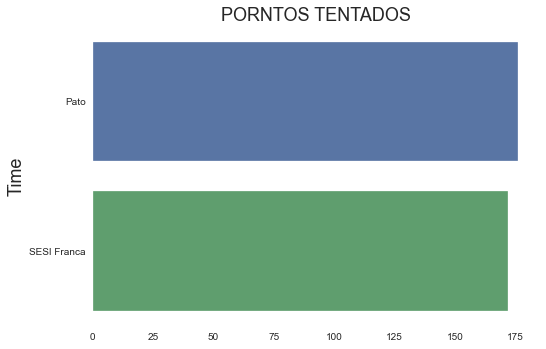

In [162]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times, hue_order=True)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16

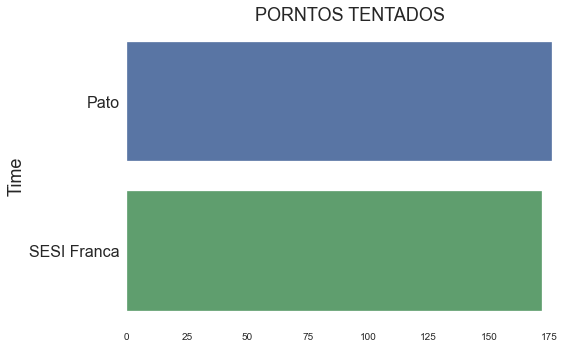

In [163]:
sns.set_style('white')
sns.barplot(x='Pts_T', y='Time', data=tabela_times)
plt.title('PORNTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_T.png', format='png')

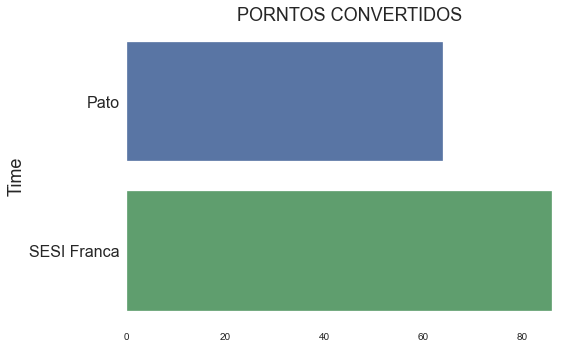

In [164]:
sns.set_style('white')
sns.barplot(x='Pts_C', y='Time', data=tabela_times)
plt.title('PORNTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_C.png', format='png')

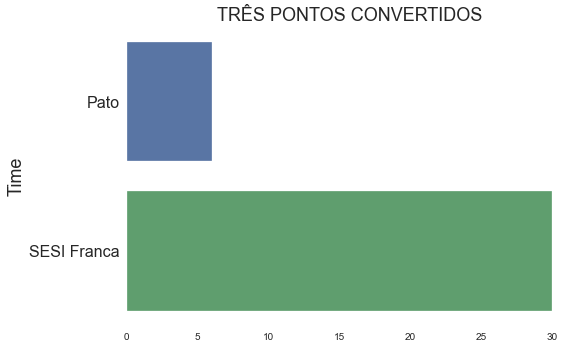

In [165]:
sns.set_style('white')
sns.barplot(x='Pts_3_C', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.ylabel('Time', fontsize=18)
plt.rcParams['ytick.labelsize'] = 16
plt.savefig('RELATORIO/Pts_3_C.png', format='png')

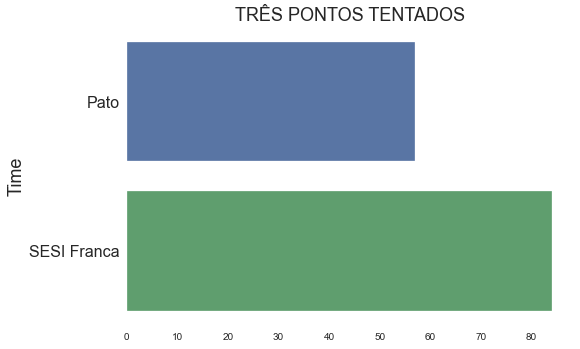

In [166]:
sns.set_style('white')
sns.barplot(x='Pts_3_T', y='Time', data=tabela_times)
plt.title('TRÊS PONTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_3_T.png', format='png')

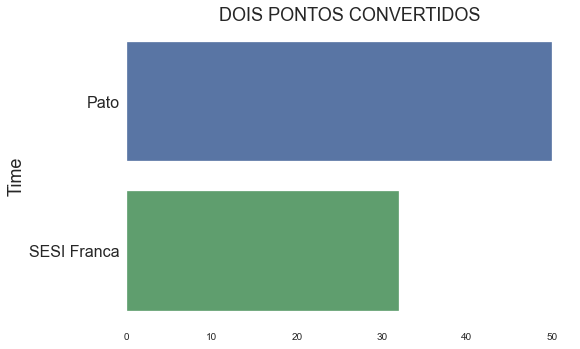

In [167]:
sns.set_style('white')
sns.barplot(x='Pts_2_C', y='Time', data=tabela_times)
plt.title('DOIS PONTOS CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_2_C.png', format='png')

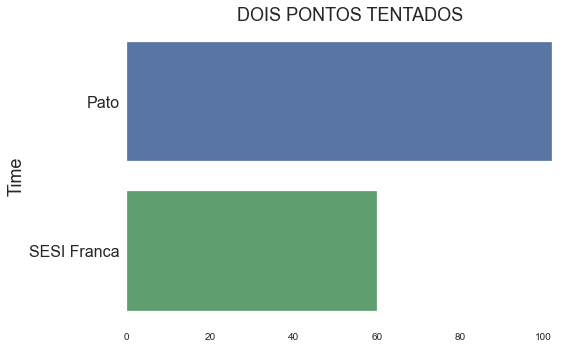

In [168]:
sns.set_style('white')
sns.barplot(x='Pts_2_T', y='Time', data=tabela_times)
plt.title('DOIS PONTOS TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/Pts_2_T.png', format='png')

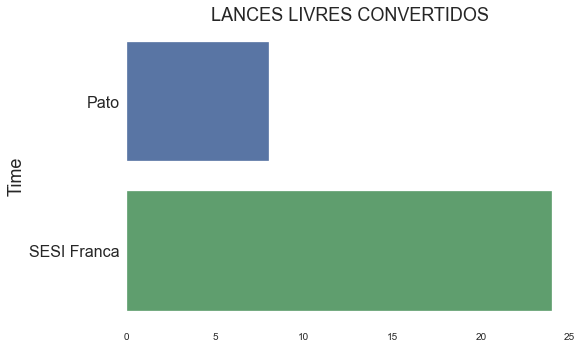

In [169]:
sns.set_style('white')
sns.barplot(x='LL_C', y='Time', data=tabela_times)
plt.title('LANCES LIVRES CONVERTIDOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/LL_C.png', format='png')

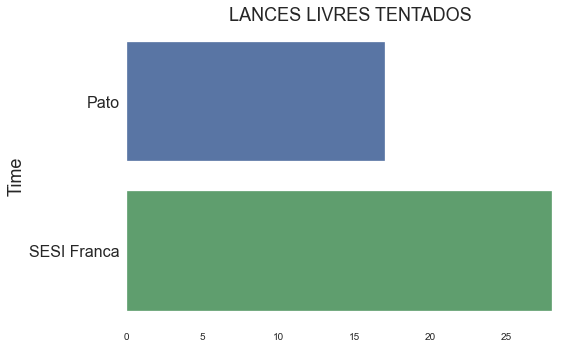

In [170]:
sns.set_style('white')
sns.barplot(x='LL_T', y='Time', data=tabela_times)
plt.title('LANCES LIVRES TENTADOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/LL_T.png', format='png')

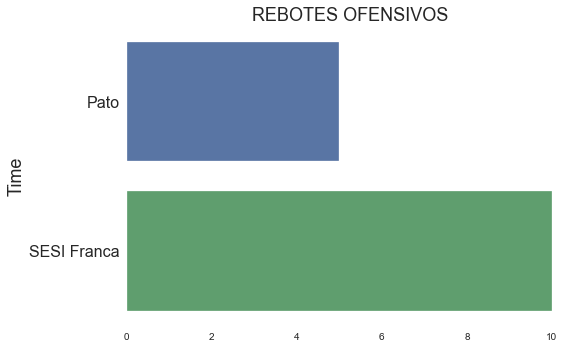

In [171]:
sns.set_style('white')
sns.barplot(x='RO', y='Time', data=tabela_times)
plt.title('REBOTES OFENSIVOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RO.png', format='png')

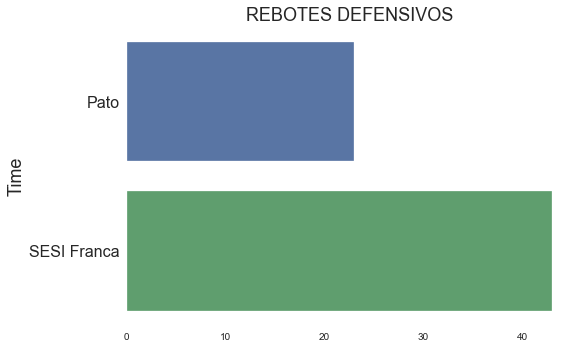

In [172]:
sns.set_style('white')
sns.barplot(x='RD', y='Time', data=tabela_times)
plt.title('REBOTES DEFENSIVOS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RD.png', format='png')

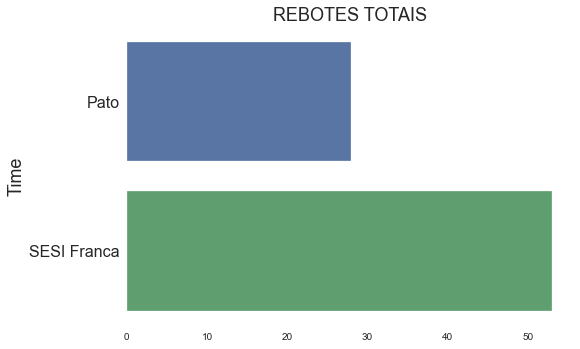

In [173]:
sns.set_style('white')
sns.barplot(x='RT', y='Time', data=tabela_times)
plt.title('REBOTES TOTAIS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/RT.png', format='png')

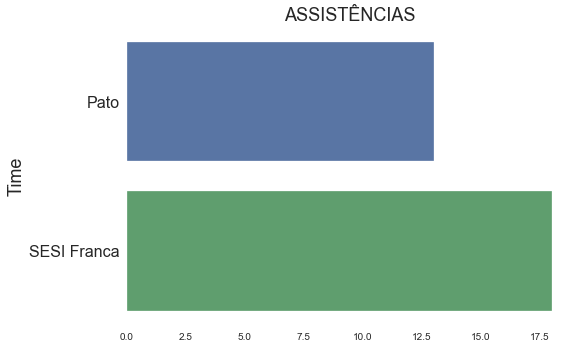

In [174]:
sns.set_style('white')
sns.barplot(x='AS', y='Time', data=tabela_times)
plt.title('ASSISTÊNCIAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/AS.png', format='png')

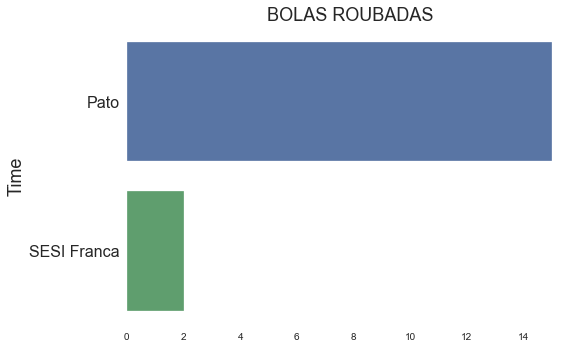

In [175]:
sns.set_style('white')
sns.barplot(x='BR', y='Time', data=tabela_times)
plt.title('BOLAS ROUBADAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/BR.png', format='png')

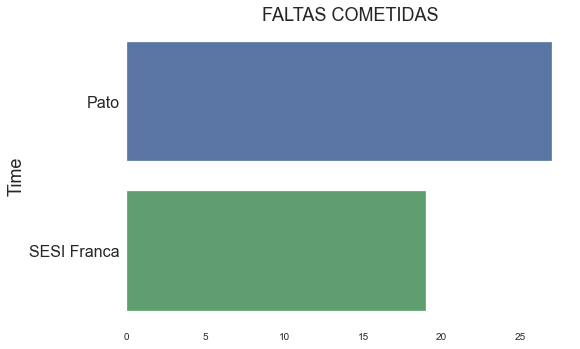

In [176]:
sns.set_style('white')
sns.barplot(x='FC', y='Time', data=tabela_times)
plt.title('FALTAS COMETIDAS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/FC.png', format='png')

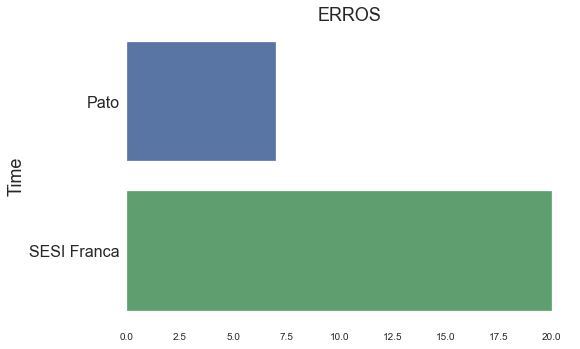

In [177]:
sns.set_style('white')
sns.barplot(x='ER', y='Time', data=tabela_times)
plt.title('ERROS', fontsize=18)
plt.xlabel('')
plt.rcParams['ytick.labelsize'] = 16
plt.ylabel('Time', fontsize=18)
plt.savefig('RELATORIO/ER.png', format='png')

# Gráficos com as análises avançadas 

Para se comparar os indicadores técnicos precisamos olhar não só do jogo mas tb da liga 

In [178]:
para_grafico_time_1 = analise[(analise['Time'] == nome_time_casa) & (analise['Nome'] == 'Equipe')]
para_grafico_time_1.reset_index(drop=True, inplace=True)

In [179]:
para_grafico_time_1.drop(['Oponente', 'Data', 'Casa/Fora', 'Classificatoria/Playoffs', 'Nome'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### precisa acrescentar ao data frame os valore que representam a melhor temporda
### Comparar com a perfeição 

In [180]:
todas_temporadas = pd.DataFrame({'Time':['Melhor'],'EF_Pts':[0.700], 'EF_Pts_3':[0.700], 'EF_LL':[4.000], 'eFG_%':[0.7],
                                 'TOV_%':[25.0], 'FTA/FGA':[0.2], 'Posse_de_Bola':[100.0], 'Offensive_Rating':[200.0],
                                 'TS_%':[1.000], 'Ass/ER':[3.000], 'AS_Ratio':[30.0]})

In [181]:
# para_grafico_temporadas = pd.concat([para_grafico,todas_temporadas], ignore_index=True)

In [182]:
para_grafico_time_1

,Time,EF_Pts,FR_3_Pts_C,FR_3_Pts_T,EF_Pts_3,FR_2_Pts_C,FR_2_Pts_T,EF_Pts_2,FR_LL_C,FR_LL_T,EF_LL,eFG_%,TOV_%,FTA/FGA,Posse_de_Bola,Offensive_Rating,TS_%,Ass/ER,AS_Ratio
0,Pato,0.364,0.281,0.972,0.105,1.562,1.159,0.49,0.125,0.097,0.471,0.358,4.0,0.315,168.0,38.1,0.192,1.857,7.7


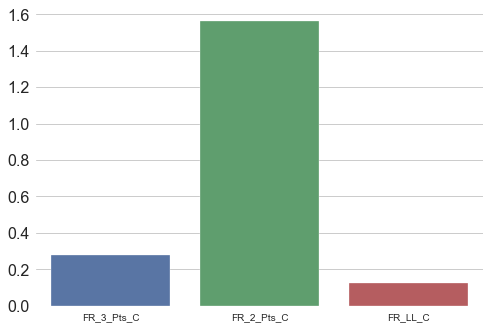

In [183]:
frequencia_certo = ['FR_3_Pts_C', 'FR_2_Pts_C', 'FR_LL_C']
valores = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
sns.set_style('whitegrid')
sns.barplot(x=frequencia_certo, y=valores)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

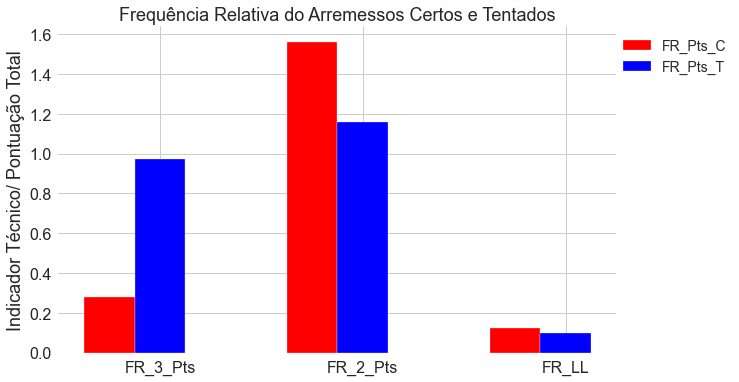

In [184]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_1['FR_3_Pts_T'][0], para_grafico_time_1['FR_2_Pts_T'][0], para_grafico_time_1['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

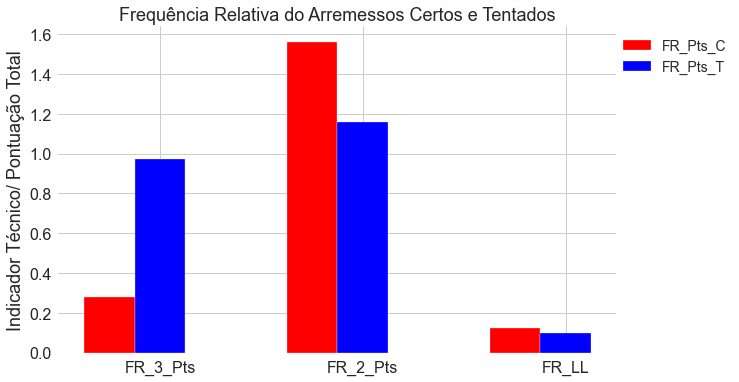

In [185]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_1['FR_3_Pts_C'][0], para_grafico_time_1['FR_2_Pts_C'][0], para_grafico_time_1['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_1['FR_3_Pts_T'][0], para_grafico_time_1['FR_2_Pts_T'][0], para_grafico_time_1['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

### Time 2

In [186]:
para_grafico_time_2 = analise[(analise['Time'] == nome_time_fora) & (analise['Nome'] == 'Equipe')]
para_grafico_time_2.reset_index(drop=True, inplace=True)

In [187]:
para_grafico_time_2.drop(['Oponente', 'Data', 'Casa/Fora', 'Classificatoria/Playoffs', 'Nome'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


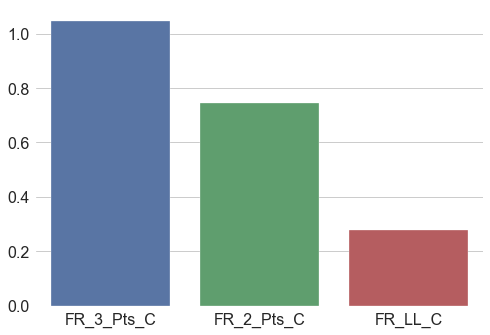

In [188]:
frequencia_certo = ['FR_3_Pts_C', 'FR_2_Pts_C', 'FR_LL_C']
valores = [para_grafico_time_2['FR_3_Pts_C'][0], para_grafico_time_2['FR_2_Pts_C'][0], para_grafico_time_2['FR_LL_C'][0]]
sns.set_style('whitegrid')
sns.barplot(x=frequencia_certo, y=valores)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

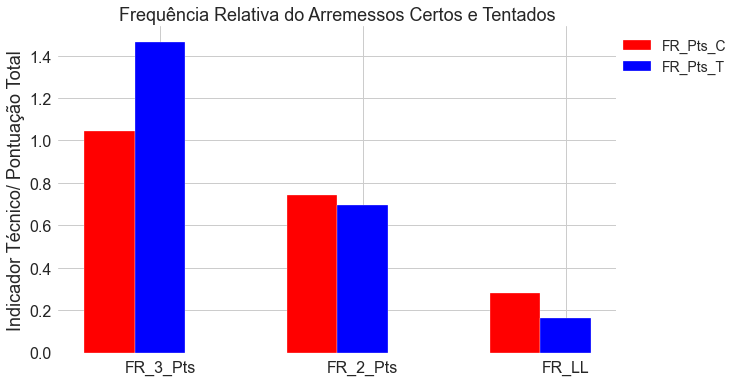

In [189]:
# Gráfico sobre a frequência relativa do arremessos certos e tentados 
FR_Pts_C = [para_grafico_time_2['FR_3_Pts_C'][0], para_grafico_time_2['FR_2_Pts_C'][0], para_grafico_time_2['FR_LL_C'][0]]
FR_Pts_T = [para_grafico_time_2['FR_3_Pts_T'][0], para_grafico_time_2['FR_2_Pts_T'][0], para_grafico_time_2['FR_LL_T'][0]]


# Definir a largura das barras
barWidth = 0.25

# Aumentar o gráfico
plt.figure(figsize=(10,6))

# Definir as posições das barras 
r1 = np.arange(len(FR_Pts_C))
r2 = [x + barWidth for x in r1]

# Estilo que vamos utilizar na barras
sns.set_style('whitegrid')

# Criar as barras 
plt.bar(r1, FR_Pts_C, color='red', width=barWidth, label='FR_Pts_C')
plt.bar(r2, FR_Pts_T, color='blue', width=barWidth, label='FR_Pts_T')


# Adicionando legendas as barras
plt.title('Frequência Relativa do Arremessos Certos e Tentados', fontsize=18)
plt.ylabel('Indicador Técnico/ Pontuação Total', fontsize=18)
plt.xlabel('')
plt.xticks([r + barWidth for r in range(len(FR_Pts_C))], ['FR_3_Pts', 'FR_2_Pts', 'FR_LL'],)

# Criar a legenda e exibir o gráfico
plt.legend(loc='upper right', bbox_to_anchor=(1.22, 1), prop={'size':14})
plt.show()

In [190]:
ponto_quarto = df[(df['Indicador'] == 'fim_quarto')][::-1]
ponto_quarto.reset_index(drop=True, inplace=True)
ponto_quarto

,Quarto,Tempo,placar_casa,placar_visitante,Time,Indicador,Nome,diferenca_placar_casa,diferenca_placar_visitante
0,1,600,12,24,NaN,fim_quarto,NaN,-12,12
1,2,1200,29,38,NaN,fim_quarto,NaN,-9,9
2,3,1800,48,65,NaN,fim_quarto,NaN,-17,17
3,4,2400,64,86,NaN,fim_quarto,NaN,-22,22


In [191]:
inf_placar_casa = ponto_quarto['placar_casa'].diff()
inf_placar_casa[0] = ponto_quarto['placar_casa'][0]
inf_placar_casa = inf_placar_casa.astype(int)
inf_placar_casa = inf_placar_casa.tolist()
inf_placar_casa

[12, 17, 19, 16]

In [192]:
inf_placar_fora = ponto_quarto['placar_visitante'].diff()
inf_placar_fora[0] = ponto_quarto['placar_visitante'][0]
inf_placar_fora = inf_placar_fora.astype(int)
inf_placar_fora = inf_placar_fora.tolist()
inf_placar_fora

[24, 14, 27, 21]

In [193]:
placar_casa = sum(inf_placar_casa)

In [194]:
placar_fora = sum(inf_placar_fora)

## mudanças 

* Colocar mais def na capa por tem jogos com prorrogação
* as corres dos times devem sincronizar com os gráficos
* acrescentar o valor de Eficiência do jogador
* acrescentar os minutos em quadra do time e jogadores (usar 'ultima_linha')
* mudar times para Arial
* mudar a palheta do tempo de posse de bola para quente (mais tempo de bola), fria (menos tempo de bola)

In [196]:
pdf = FPDF('P', 'mm', 'A4')
# Capa do relatório
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# capa
criar_titulo(pdf, data_hoje)
fotos_dos_times(pdf, img_casa, nome_time_casa, img_fora, nome_time_fora)
informacoes_do_placar(pdf, classificatoria, placar_casa, placar_fora, dia_do_jogo)
grafico_quartos_normal(pdf, nome_time_casa, nome_time_fora)
placar_do_quarto1(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto2(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto3(pdf, inf_placar_casa, inf_placar_fora)
placar_do_quarto4(pdf, inf_placar_casa, inf_placar_fora)
placar_final(pdf, placar_casa, placar_fora)
informacoes_do_relatorio(pdf)


# Primeira página de Análises 
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Títulos das Análises
comentarios_p1(pdf)
# Gráficos das Análises linha 1
graficos_analise_descrivita_l1(pdf, tabela_times, arquivo)
# Gráficos das Análises linha 2
graficos_analise_descrivita_l2(pdf, tabela_times, arquivo)
comentarios_p1_1(pdf)
# Gráficos das Análises linha 3
graficos_analise_descrivita_l3(pdf, tabela_times, arquivo)
# Gráficos das Análises linha 4
graficos_analise_descrivita_l4(pdf, tabela_times, arquivo)
comentarios_p1_2(pdf)

# Segunda Página de Análises 
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Comentarios das Análises Avançadas
comentarios_p2(pdf)
# Gráficos das Análises
graficos_analise_avancadas_c1(pdf, tabela_times, arquivo)
graficos_analise_avancadas_c2(pdf, tabela_times, arquivo)
graficos_analise_avancadas_c3(pdf, tabela_times, arquivo)
# considerações finais 
comentarios_p2_1(pdf)


# Terceira Página de Análises Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Análises
comentarios_p3(pdf, nome_time_casa)
# Análise do time da casa
melhores_jogadores_l1(pdf)
melhores_jogadores_l2(pdf)
# foto dos jogadores
foto_melhor_pontuador(pdf, arquivo1, pontos_c_1)
cinco_melhores_pontuadores(pdf, pontos_c_1)

# foto dos melhores  porntuadores de três
foto_melhor_pontuador_tres(pdf, arquivo1, tres_pontos_c_1)
cinco_melhores_pontuadores_tres(pdf, tres_pontos_c_1)
# foto dos melhores  porntuadores de dois
foto_melhor_pontuador_dois(pdf, arquivo1, dois_pontos_c_1)
cinco_melhores_pontuadores_dois(pdf, dois_pontos_c_1)
# foto dos melhores assistentes
foto_melhor_assistente(pdf, arquivo1, as_1)
cinco_melhores_assistencias(pdf, as_1)
# foto dos melhores reboteiros
foto_melhor_rebotes(pdf, arquivo1, rt_1)
cinco_melhores_reboteiros(pdf, rt_1)
# foto dos melhores faltas recebidas
foto_melhor_faltas_recebidas(pdf, arquivo1, fr_1)
cinco_melhores_faltas_recebidas(pdf, fr_1)
# tabela geral
tabela_geral_casa(pdf, arquivo)

# Quarta Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Positivos do Time da Casa
comentarios_p4(pdf, nome_time_casa)
# Gráfico dos Períodos Positos do Time da Casa
grafico_periodos_positivos_casa(pdf, arquivo)
# Gráfico do tempo de Posse de Bola do Time da Casa 
grafico_tempo_posse_de_bola_casa(pdf, arquivo)
# Comentários
comentarios_p4_1(pdf)

# Quinta Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título do cinco melores jogadores
comentarios_p5(pdf, nome_time_casa)
primeiro_quinteto_fotos_casa(pdf)
segundo_quinteto_fotos_casa(pdf)
terceiro_quinteto_fotos_casa(pdf)
# Título das Melhores substituições
comentarios_p5_1(pdf)
# Jogadores e Comentários
substituicao_1_casa(pdf)
substituicao_2_casa(pdf)

# Sexta Página de Análises Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Análises
comentarios_p3(pdf, nome_time_fora)
# Análise do time da casa
melhores_jogadores_l1(pdf)
melhores_jogadores_l2(pdf)
# foto dos jogadores
foto_melhor_pontuador(pdf, arquivo2, pontos_c_2)
cinco_melhores_pontuadores(pdf, pontos_c_2)
# foto dos melhores  porntuadores de três
foto_melhor_pontuador_tres(pdf, arquivo2, tres_pontos_c_2)
cinco_melhores_pontuadores_tres(pdf, tres_pontos_c_2)
# foto dos melhores  porntuadores de dois
foto_melhor_pontuador_dois(pdf, arquivo2, dois_pontos_c_2)
cinco_melhores_pontuadores_dois(pdf, dois_pontos_c_2)
# foto dos melhores assistentes
foto_melhor_assistente(pdf, arquivo2, as_2)
cinco_melhores_assistencias(pdf, as_2)
# foto dos melhores reboteiros
foto_melhor_rebotes(pdf, arquivo2, rt_2)
cinco_melhores_reboteiros(pdf, rt_2)
# foto dos melhores faltas recebidas
foto_melhor_faltas_recebidas(pdf, arquivo2, fr_2)
cinco_melhores_faltas_recebidas(pdf, fr_2)
# tabela geral
tabela_geral_fora(pdf, arquivo)

# Setima Página Períodos Positivos do Time da Fora
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título/Comentarios das Positivos do Time da Fora
comentarios_p7(pdf, nome_time_fora)
# Gráfico dos Períodos Positos do Time da Fora
grafico_periodos_positivos_fora(pdf, arquivo)
# Gráfico do tempo de Posse de Bola do Time da Fora 
grafico_tempo_posse_de_bola_fora(pdf, arquivo)
# Comentários
comentarios_p7_1(pdf)

# Oitava Página Períodos Positivos do Time da Casa
pdf.add_page()
# Cabeçalho e Rodapé
cabecalho_rodape(pdf, arquivo)
# Título do cinco melores jogadores
comentarios_p8(pdf, nome_time_fora)
primeiro_quinteto_fotos_fora(pdf)
segundo_quinteto_fotos_fora(pdf)
terceiro_quinteto_fotos_fora(pdf)
# Título das Melhores substituições
comentarios_p8_1(pdf)
# Jogadores e Comentários
substituicao_1_fora(pdf)
substituicao_2_fora(pdf)

pdf.output('teste.pdf', 'F')

''

# identificação dos quintetos em quadra 

In [ ]:
# faz um if com o seguinte critério 
# if aparecer substituição_entra:
#     a função adiciona o jogador x
# elif aparecer substituição_sai:
#     a função substitui o valor por 0